In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

**Exploratory Analysis**

In [2]:
# Import a .csv file with ";" as delimiter
bd = pd.read_csv('bank-full.csv', delimiter=';')
pd.set_option('display.max_columns', None) # all columns

print(bd)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [3]:
# List the data types for all the columns
data_types = bd.dtypes

print(data_types)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [4]:
# Convert "yes"/"no" columns to boolean
yes_no_cols = ['default', 'housing', 'loan', 'y']
bd[yes_no_cols] = bd[yes_no_cols].replace({'yes': 1, 'no': 0})

In [5]:
# Create a variable listing the columns in the dataset that are numeric
numeric_columns = bd.select_dtypes(include=['int64', 'float64']).columns

In [6]:
# Show descriptive statistics for numeric fields
numeric_stats = bd[numeric_columns].describe()

print(numeric_stats)

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

                day      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419    258.163080      2.763841     40.197828      0.580323   
std        8.322476    257.527812      3.0

In [7]:
pdays_nonegatives = bd['pdays'][bd['pdays'] >= 0]
pdays_nonegatives_stats = pdays_nonegatives.describe()
print(pdays_nonegatives_stats)

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64


In [8]:
# Check for duplicates, errors, and null values
duplicates = bd[bd.duplicated()]
null_values = bd.isnull().sum()

print(duplicates)
print(null_values)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


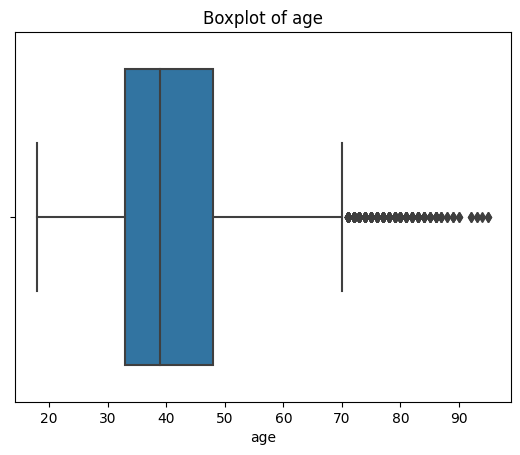

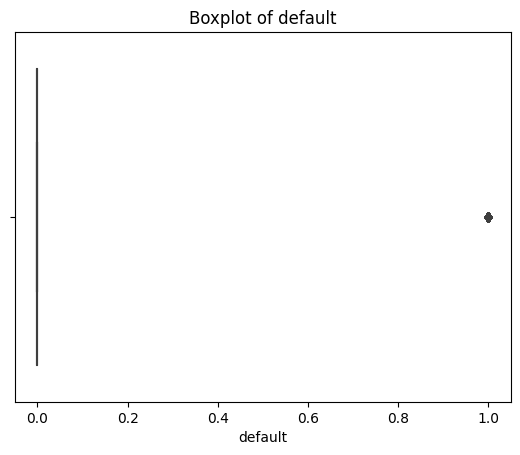

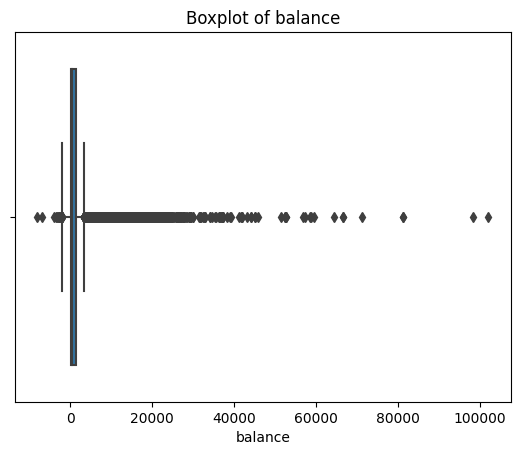

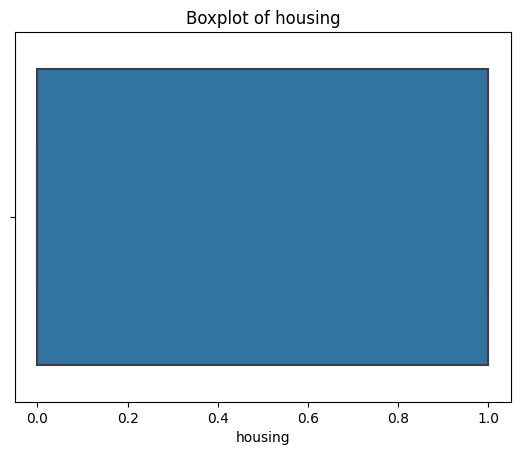

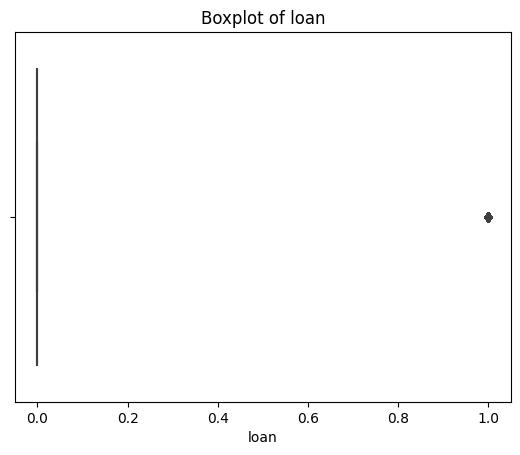

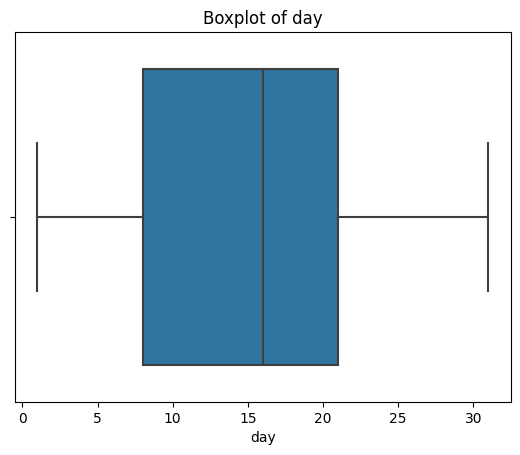

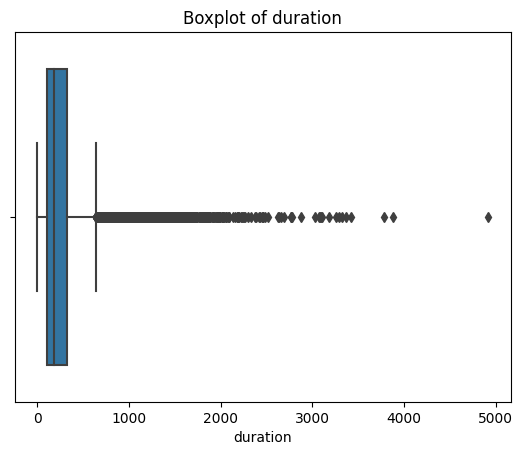

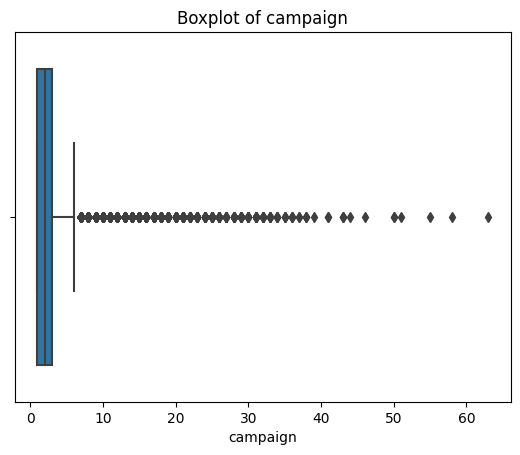

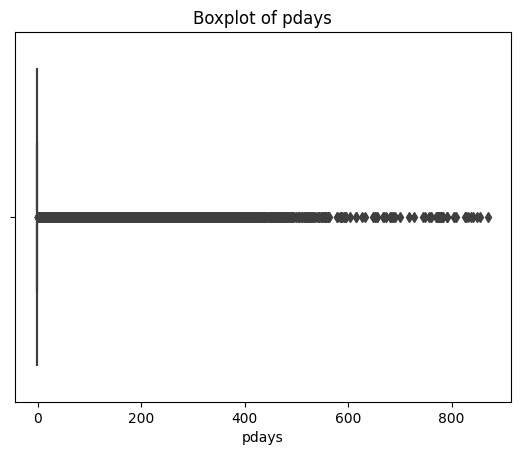

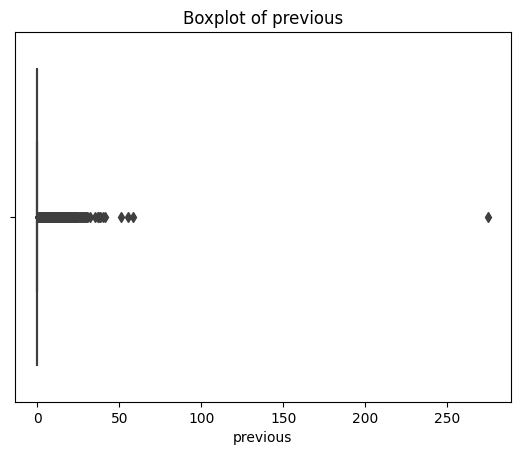

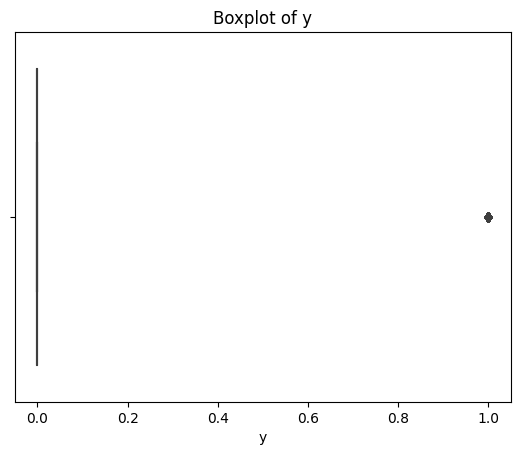

In [9]:
# Show boxplots for numeric columns
for col in numeric_columns:
    sns.boxplot(x=bd[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


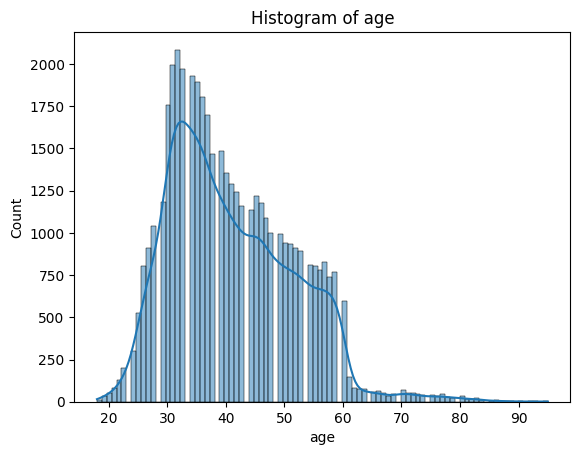

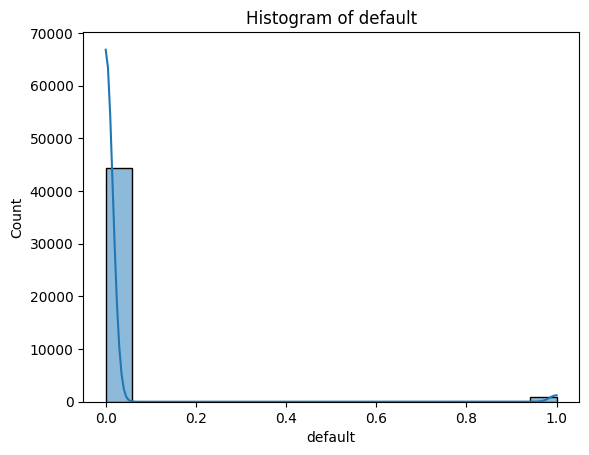

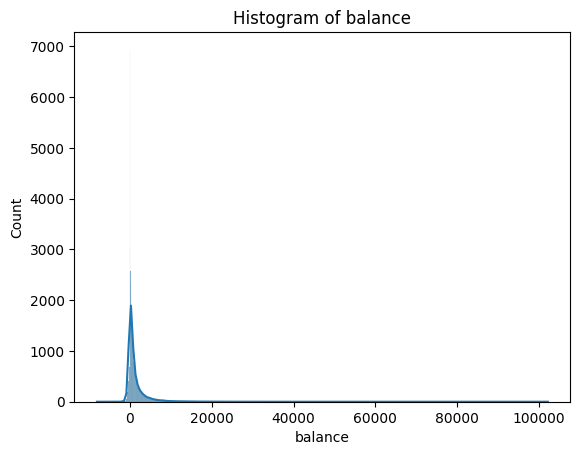

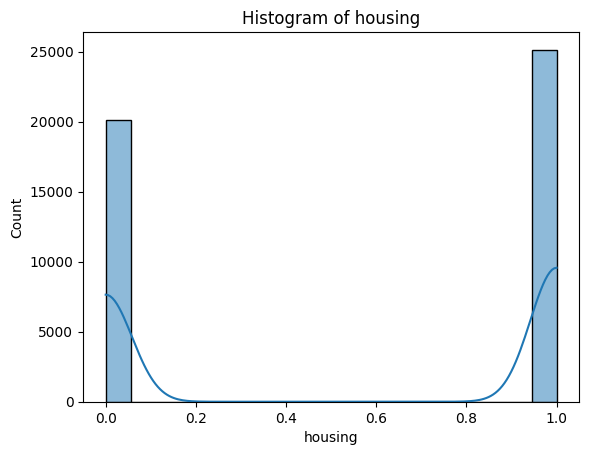

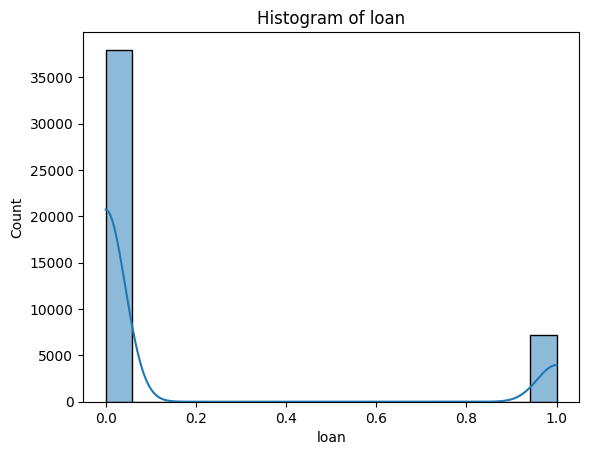

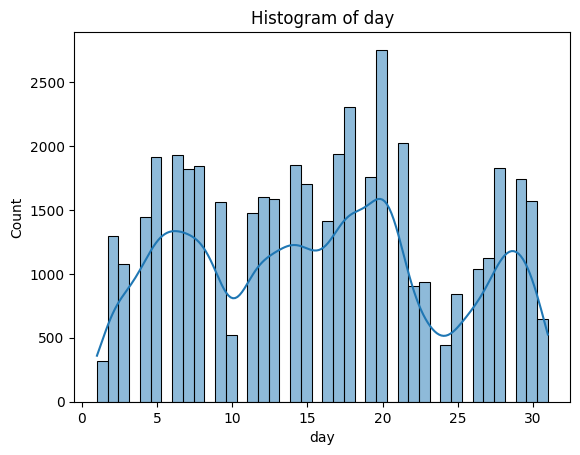

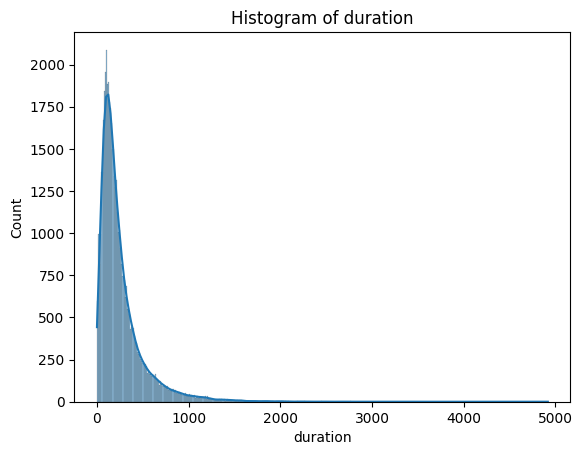

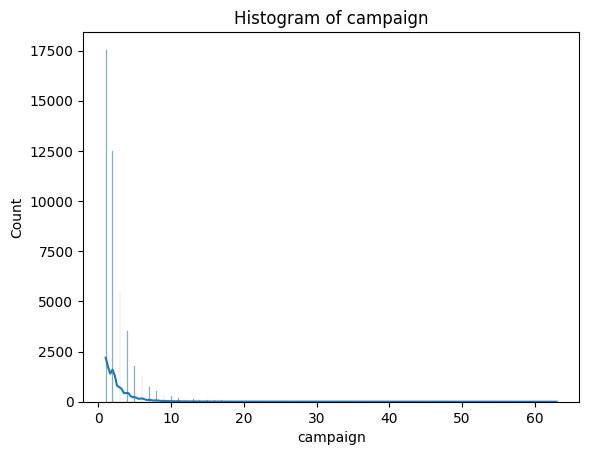

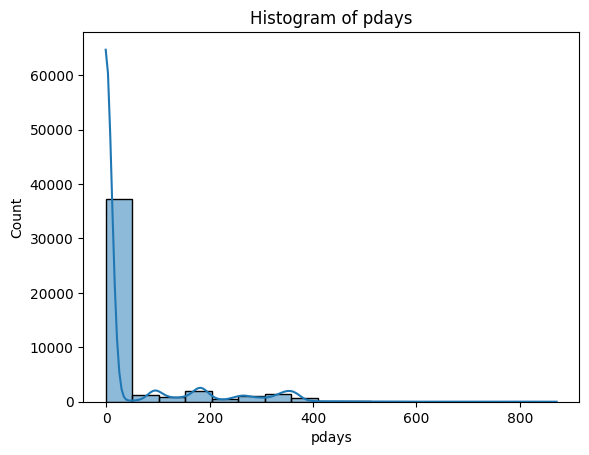

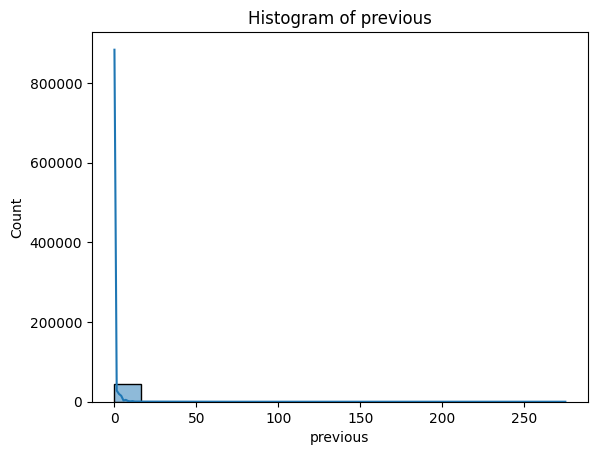

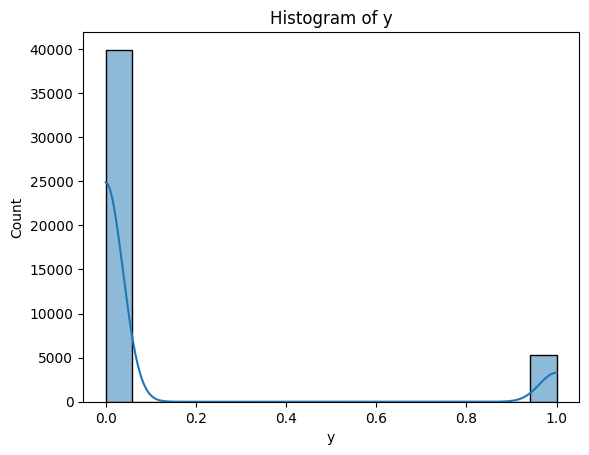

In [10]:
# Show histograms for numeric columns
for col in numeric_columns:
    sns.histplot(bd[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


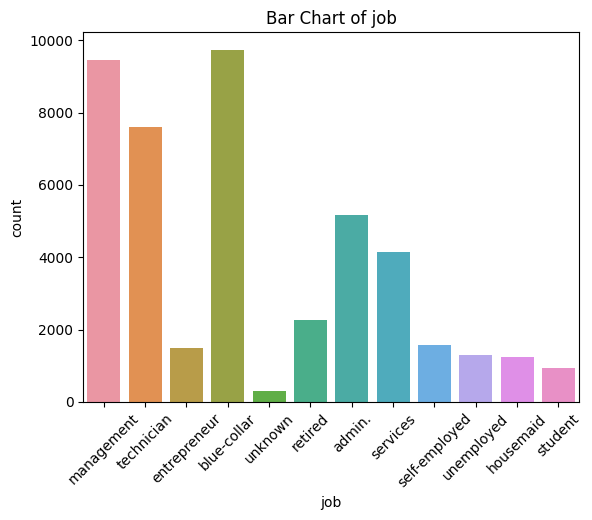

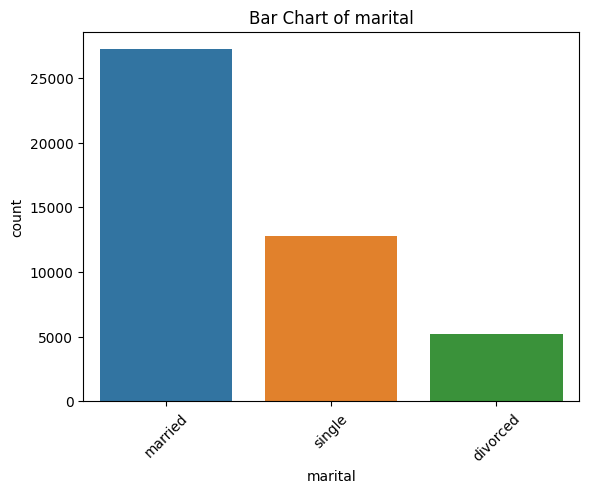

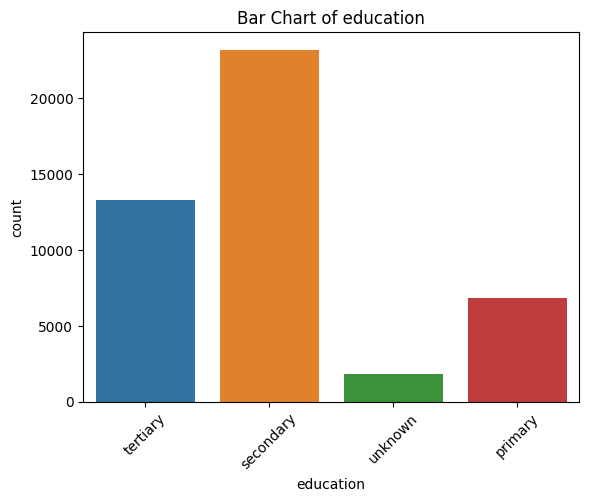

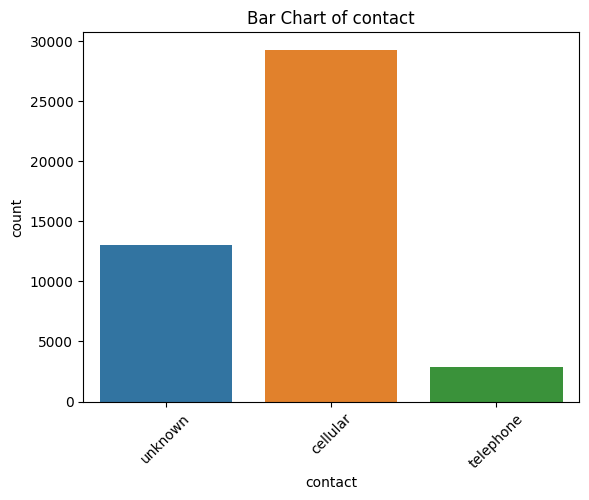

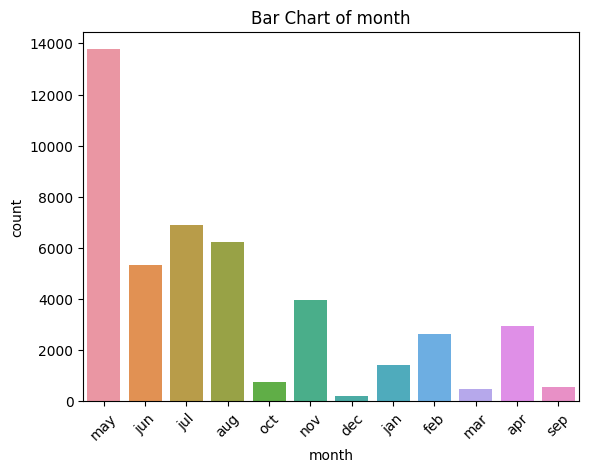

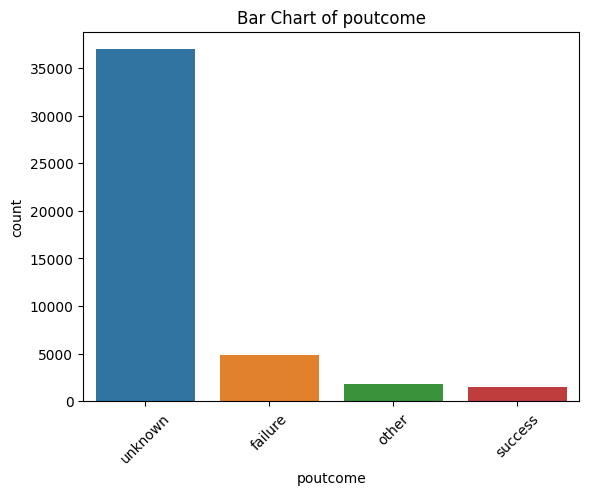

In [11]:
# Show bar charts for categorical columns
categorical_columns = bd.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sns.countplot(data=bd, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

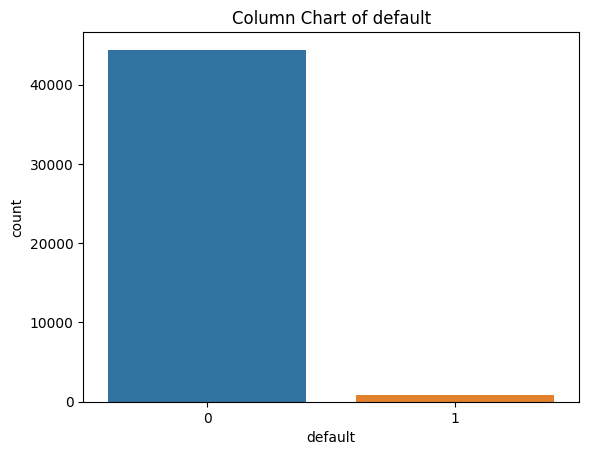

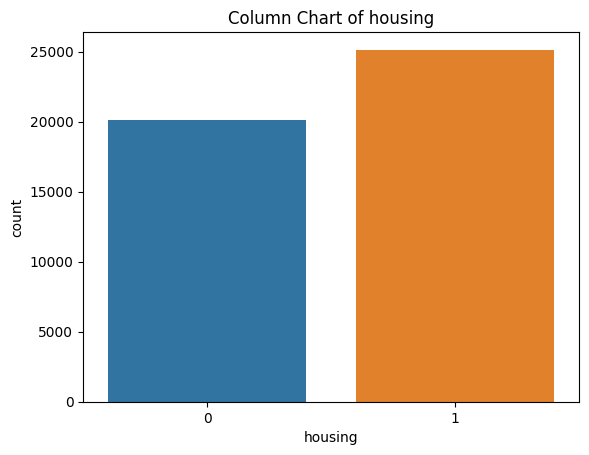

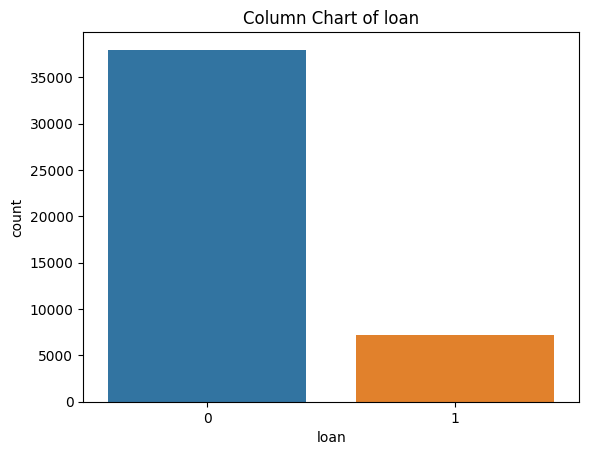

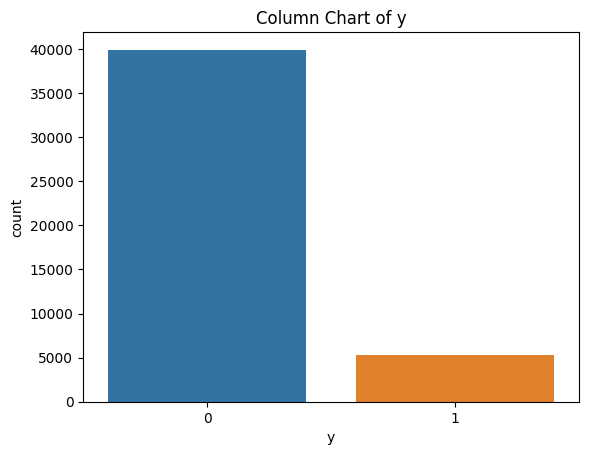

In [12]:
# Show column charts for boolean columns
for col in yes_no_cols:
    sns.countplot(data=bd, x=col)
    plt.title(f'Column Chart of {col}')
    plt.show()


In [13]:
pdays_counts = bd['pdays'].value_counts(normalize=True)

# Create a DataFrame to display both unique values and their proportions
pdays_counts_df = pd.DataFrame({'Pdays': pdays_counts.index, 'Proportion': pdays_counts.values})


pdays_counts_df = pdays_counts_df.sort_values(by='Pdays')

print(pdays_counts_df)


pdays_counts = bd['pdays'].value_counts().sort_values(ascending=False)


top_3_pdays = pdays_counts.head(3)
print(top_3_pdays)


     Pdays  Proportion
0       -1    0.817367
186      1    0.000332
58       2    0.000818
448      3    0.000022
382      4    0.000044
..     ...         ...
483    838    0.000022
472    842    0.000022
475    850    0.000022
477    854    0.000022
441    871    0.000022

[559 rows x 2 columns]
-1      36954
 182      167
 92       147
Name: pdays, dtype: int64


In [14]:
previous_counts = bd['previous'].value_counts().reset_index()
previous_counts.columns = ['previous_value', 'count']

# Sort the values by count in descending order
previous_counts = previous_counts.sort_values(by='count', ascending=False)

print(previous_counts.head())


   previous_value  count
0               0  36954
1               1   2772
2               2   2106
3               3   1142
4               4    714


**Grouping numerical variables with many outliers (age, balance, campaign, pdays and previous)**

In [15]:
bd['age_group'] = pd.cut(
    bd['age'],
    bins=[17, 24, 34, 44, 59, 100],
    labels=['18-24', '25-34', '35-44', '45-59', '60+'],
    right=False
)
print(bd[['age', 'age_group']].head())



   age age_group
0   58     45-59
1   44     45-59
2   33     25-34
3   47     45-59
4   33     25-34


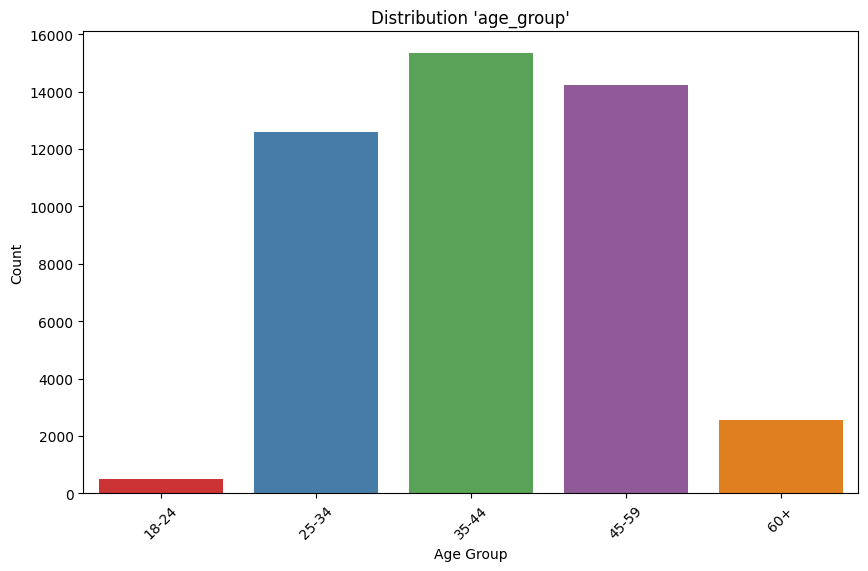

In [16]:
age_group_counts = bd['age_group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="Set1")
plt.title("Distribution 'age_group'")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [17]:
min_balance =bd['balance'].min()
max_balance =bd['balance'].max()

print(f"Min 'balance': {min_balance}")
print(f"Max 'balance': {max_balance}")

# Grouping

intervals = [-8019, 0, 10000, 30000, float('inf')]

labels = ['-8019 ~ 0' , '0 ~ 10000', '10000 ~ 30000', '30000 +']

bd['balance_interval'] = pd.cut(bd['balance'], bins=intervals, labels=labels)


print(bd[['balance', 'balance_interval']])


Min 'balance': -8019
Max 'balance': 102127
       balance balance_interval
0         2143        0 ~ 10000
1           29        0 ~ 10000
2            2        0 ~ 10000
3         1506        0 ~ 10000
4            1        0 ~ 10000
...        ...              ...
45206      825        0 ~ 10000
45207     1729        0 ~ 10000
45208     5715        0 ~ 10000
45209      668        0 ~ 10000
45210     2971        0 ~ 10000

[45211 rows x 2 columns]


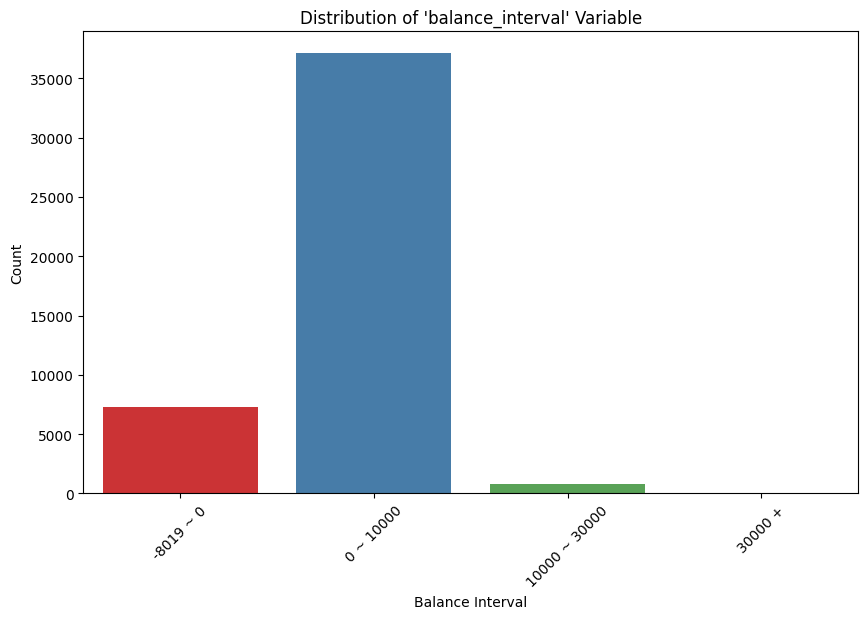

In [18]:
balance_interval_counts = bd['balance_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=balance_interval_counts.index, y=balance_interval_counts.values, palette="Set1")
plt.title("Distribution of 'balance_interval' Variable")
plt.xlabel("Balance Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [19]:
min_duration = bd['duration'].min()
max_duration = bd['duration'].max()

print(f"Min 'duration': {min_duration}")
print(f"Max 'duration': {max_duration}")

# Grouping

intervals = [0, 500, 1000, 2000, 4918]

labels = ['0 ~ 500', '500 ~ 1000', '1000 ~ 2000', '2000 +']

bd['duration_interval'] = pd.cut(bd['duration'], bins=intervals, labels=labels)

print(bd[['duration', 'duration_interval']])



Min 'duration': 0
Max 'duration': 4918
       duration duration_interval
0           261           0 ~ 500
1           151           0 ~ 500
2            76           0 ~ 500
3            92           0 ~ 500
4           198           0 ~ 500
...         ...               ...
45206       977        500 ~ 1000
45207       456           0 ~ 500
45208      1127       1000 ~ 2000
45209       508        500 ~ 1000
45210       361           0 ~ 500

[45211 rows x 2 columns]


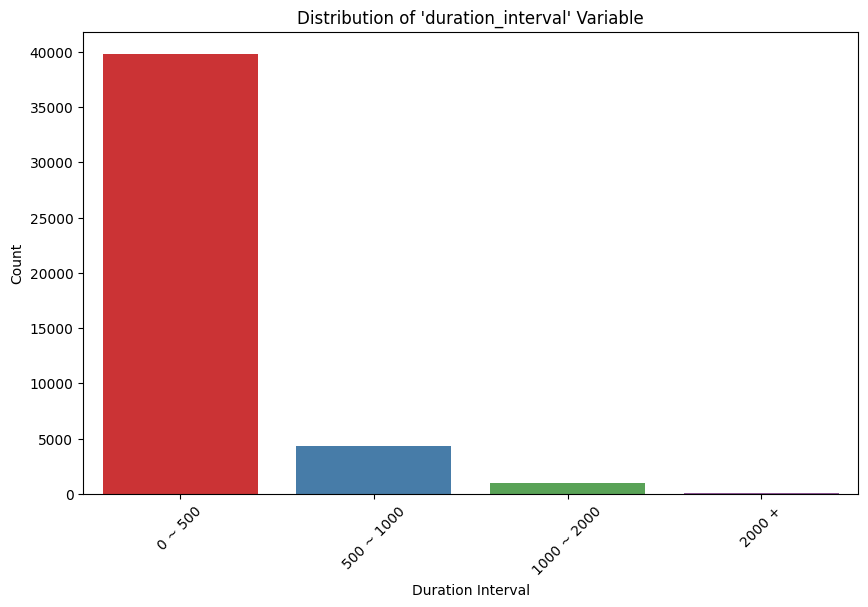

In [20]:
duration_interval_counts = bd['duration_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_interval_counts.index, y=duration_interval_counts.values, palette="Set1")
plt.title("Distribution of 'duration_interval' Variable")
plt.xlabel("Duration Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [21]:
min_campaign = bd['campaign'].min()
max_campaign = bd['campaign'].max()

print(f"Min 'campaign': {min_campaign}")
print(f"Max 'campaign': {max_campaign}")

# Grouping

intervals = [0, 5, 10, 15, 63]

labels = ['0 ~ 5', '5 ~ 10', '10 ~ 15', '15 +']

bd['campaign_interval'] = pd.cut(bd['campaign'], bins=intervals, labels=labels)

print(bd[['campaign', 'campaign_interval']])

Min 'campaign': 1
Max 'campaign': 63
       campaign campaign_interval
0             1             0 ~ 5
1             1             0 ~ 5
2             1             0 ~ 5
3             1             0 ~ 5
4             1             0 ~ 5
...         ...               ...
45206         3             0 ~ 5
45207         2             0 ~ 5
45208         5             0 ~ 5
45209         4             0 ~ 5
45210         2             0 ~ 5

[45211 rows x 2 columns]


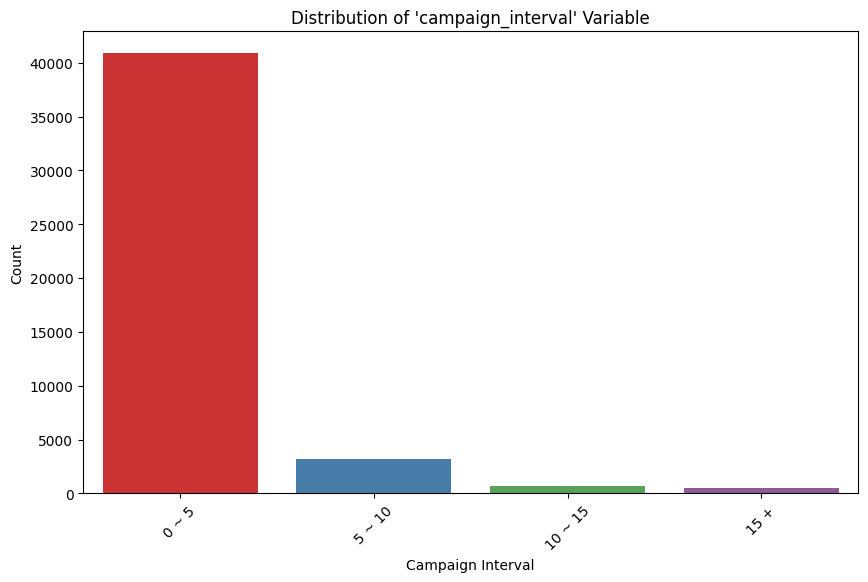

In [22]:
campaign_interval_counts = bd['campaign_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_interval_counts.index, y=campaign_interval_counts.values, palette="Set1")
plt.title("Distribution of 'campaign_interval' Variable")
plt.xlabel("Campaign Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [23]:
min_pdays = bd['pdays'].min()
max_pdays = bd['pdays'].max()

print(f"Min 'pdays': {min_pdays}")
print(f"Max 'pdays': {max_pdays}")

# Grouping

intervals = [-2, 0, 100, 200, 300, 400, 871]

labels = ['-1 ~ 0', '0 ~ 100', '100 ~ 200', '200 ~ 300', '300 ~ 400', '400 +']

bd['pdays_interval'] = pd.cut(bd['pdays'], bins=intervals, labels=labels)

print(bd[['pdays', 'pdays_interval']])

Min 'pdays': -1
Max 'pdays': 871
       pdays pdays_interval
0         -1         -1 ~ 0
1         -1         -1 ~ 0
2         -1         -1 ~ 0
3         -1         -1 ~ 0
4         -1         -1 ~ 0
...      ...            ...
45206     -1         -1 ~ 0
45207     -1         -1 ~ 0
45208    184      100 ~ 200
45209     -1         -1 ~ 0
45210    188      100 ~ 200

[45211 rows x 2 columns]


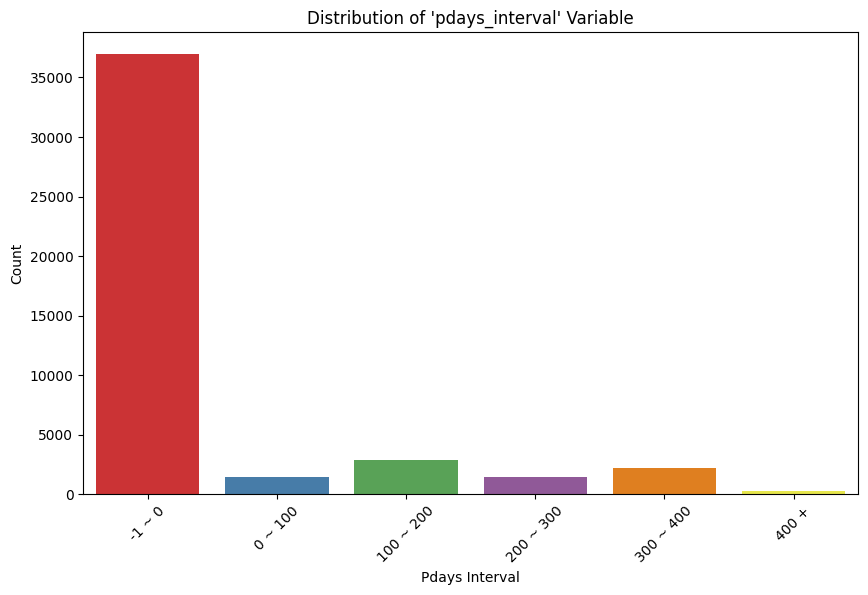

In [24]:
pdays_interval_counts = bd['pdays_interval'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=pdays_interval_counts.index, y=pdays_interval_counts.values, palette="Set1")
plt.title("Distribution of 'pdays_interval' Variable")
plt.xlabel("Pdays Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [25]:
min_previous = bd['previous'].min()
max_previous = bd['previous'].max()

print(f"Min 'previous': {min_previous}")
print(f"Max 'previous': {max_previous}")

# Grouping

intervals = [-1, 10, 20, 30, 40, 275]

labels = ['0 ~ 10', '10 ~ 20', '20 ~ 30', '30 ~ 40', '40 +']

bd['previous_interval'] = pd.cut(bd['previous'], bins=intervals, labels=labels)

print(bd[['previous', 'previous_interval']])


Min 'previous': 0
Max 'previous': 275
       previous previous_interval
0             0            0 ~ 10
1             0            0 ~ 10
2             0            0 ~ 10
3             0            0 ~ 10
4             0            0 ~ 10
...         ...               ...
45206         0            0 ~ 10
45207         0            0 ~ 10
45208         3            0 ~ 10
45209         0            0 ~ 10
45210        11           10 ~ 20

[45211 rows x 2 columns]


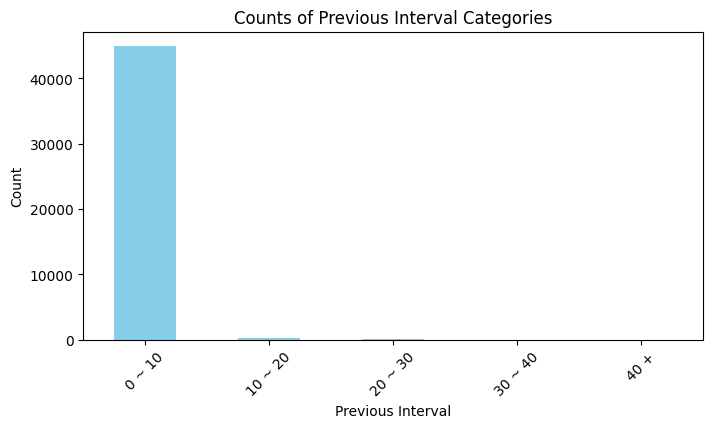

In [26]:
previous_interval_counts = bd['previous_interval'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 4))
previous_interval_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Previous Interval Categories')
plt.xlabel('Previous Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Treating Categorical Variables**

In [27]:
# Unique values in the 'job' column

unique_jobs = bd['job'].unique()
print(unique_jobs)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [28]:
# Grouping job variable
bd_manuallabor = bd[(bd['job'] == 'blue-collar') | (bd['job'] == 'housemaid')]
bd_employee = bd[(bd['job'] == 'admin.') | (bd['job'] == 'services') | (bd['job'] == 'technician') | (bd['job'] == 'management')]
bd_selfemployed = bd[(bd['job'] == 'entrepreneur') | (bd['job'] == 'self-employed') ]
bd_student = bd[(bd['job'] == 'student')]
bd_retired = bd[(bd['job'] == 'retired')]
bd_unemployed = bd[(bd['job'] == 'unemployed')]

# Update 'job' column with grouped categories
bd.loc[bd_manuallabor.index, 'job'] = 'Manual Labour'
bd.loc[bd_employee.index, 'job'] = 'Employee'
bd.loc[bd_selfemployed.index, 'job'] = 'Self Employed'
bd.loc[bd_student.index, 'job'] = 'Student'
bd.loc[bd_retired.index, 'job'] = 'Retired'
bd.loc[bd_unemployed.index, 'job'] = 'Unemployed'

print(bd.job)


0             Employee
1             Employee
2        Self Employed
3        Manual Labour
4              unknown
             ...      
45206         Employee
45207          Retired
45208          Retired
45209    Manual Labour
45210    Self Employed
Name: job, Length: 45211, dtype: object


In [29]:
# Calculate the percentage distribution of values in the 'job' column
job_percentages = (bd['job'].value_counts() / len(bd)) * 100

# Calculate the percentage distribution of values in the 'education' column
education_percentages = (bd['education'].value_counts() / len(bd)) * 100

print(job_percentages)
print(education_percentages)


Employee         58.348632
Manual Labour    24.268430
Self Employed     6.781535
Retired           5.007631
Unemployed        2.882042
Student           2.074716
unknown           0.637013
Name: job, dtype: float64
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64


In [30]:
# ONE-HOT ENCODING

# List of categorical variables to be transformed
categorical_columns = ["job", "marital", "education", "contact", "month", "poutcome","age_group", "balance_interval","duration_interval","campaign_interval","pdays_interval","previous_interval"]

# Perform one-hot encoding transformation for each categorical variable
bd = pd.get_dummies(bd, columns=categorical_columns)
print(bd.head())


   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous  y  job_Employee  job_Manual Labour  job_Retired  \
0         0  0             1                  0            0   
1         0  0             1                  0            0   
2         0  0             0                  0            0   
3         0  0             0                  1            0   
4         0  0             0                  0            0   

   job_Self Employed  job_Student  job_Unemployed  job_unknown  \
0                  0            0               0            0   
1                  0            

In [31]:
# Check the numeric columns

total_columns = len(bd.columns)

numeric_columns = bd.select_dtypes(include=['number'])

num_numeric_columns = numeric_columns.shape[1]

num_categorical_columns = total_columns - num_numeric_columns

print(f"Total Columns: {total_columns}")
print(f"Total Numerics: {num_numeric_columns}")
print(f"Total Categorical: {num_categorical_columns}")

Total Columns: 72
Total Numerics: 72
Total Categorical: 0


In [32]:
# Drop columns

bd = bd.drop(columns=['age'])
bd = bd.drop(columns=['balance'])
bd = bd.drop(columns=['duration'])
bd = bd.drop(columns=['campaign'])
bd = bd.drop(columns=['pdays'])
bd = bd.drop(columns=['previous'])

print(bd.head())

   default  housing  loan  day  y  job_Employee  job_Manual Labour  \
0        0        1     0    5  0             1                  0   
1        0        1     0    5  0             1                  0   
2        0        1     1    5  0             0                  0   
3        0        1     0    5  0             0                  1   
4        0        0     0    5  0             0                  0   

   job_Retired  job_Self Employed  job_Student  job_Unemployed  job_unknown  \
0            0                  0            0               0            0   
1            0                  0            0               0            0   
2            0                  1            0               0            0   
3            0                  0            0               0            0   
4            0                  0            0               0            1   

   marital_divorced  marital_married  marital_single  education_primary  \
0                 0          

In [33]:
#Check after the drop

total_columns = len(bd.columns)

numeric_columns = bd.select_dtypes(include=['number'])

num_numeric_columns = numeric_columns.shape[1]

num_categorical_columns = total_columns - num_numeric_columns

print(f"Total Columns: {total_columns}")
print(f"Total Numerics: {num_numeric_columns}")
print(f"Total Categorical: {num_categorical_columns}")

Total Columns: 66
Total Numerics: 66
Total Categorical: 0


In [34]:
numeric_stats = bd.describe()
print(numeric_stats)

            default       housing          loan           day             y  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.018027      0.555838      0.160226     15.806419      0.116985   
std        0.133049      0.496878      0.366820      8.322476      0.321406   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        0.000000      0.000000      0.000000      8.000000      0.000000   
50%        0.000000      1.000000      0.000000     16.000000      0.000000   
75%        0.000000      1.000000      0.000000     21.000000      0.000000   
max        1.000000      1.000000      1.000000     31.000000      1.000000   

       job_Employee  job_Manual Labour   job_Retired  job_Self Employed  \
count  45211.000000       45211.000000  45211.000000       45211.000000   
mean       0.583486           0.242684      0.050076           0.067815   
std        0.492986           0.428711      0.218105           

**Bivariate analysis**

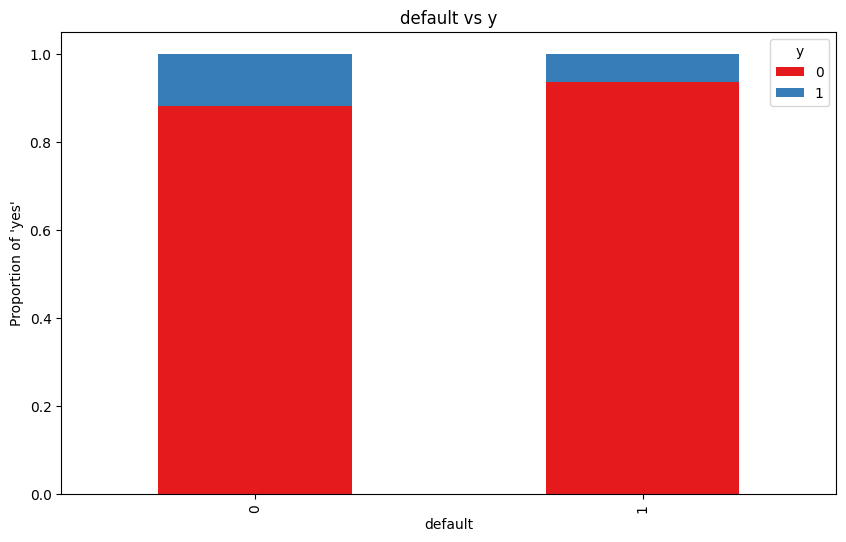

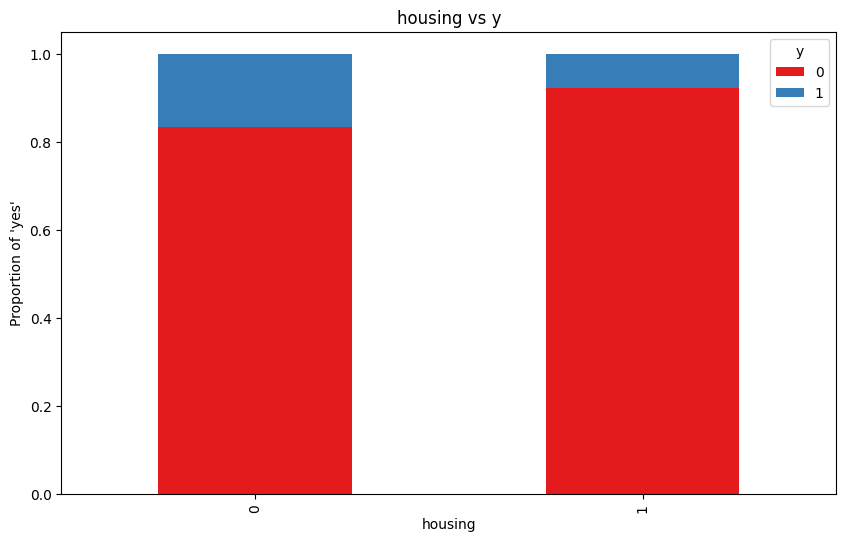

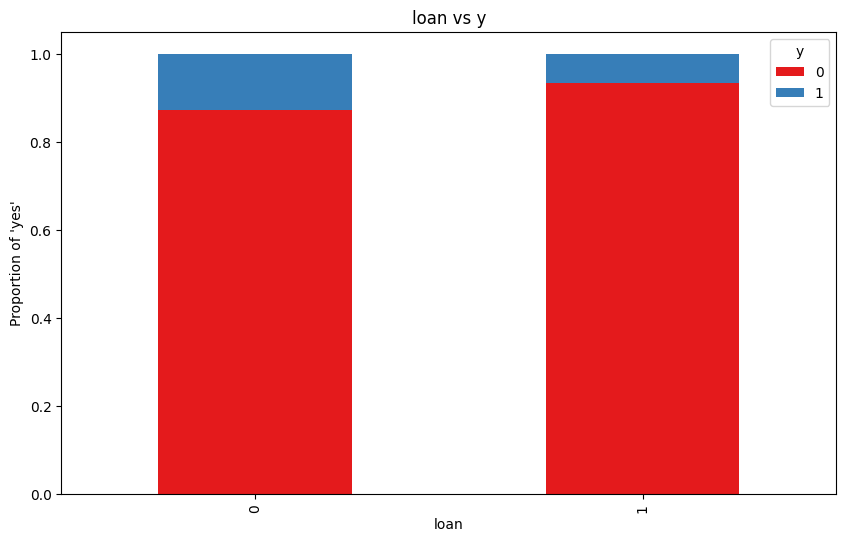

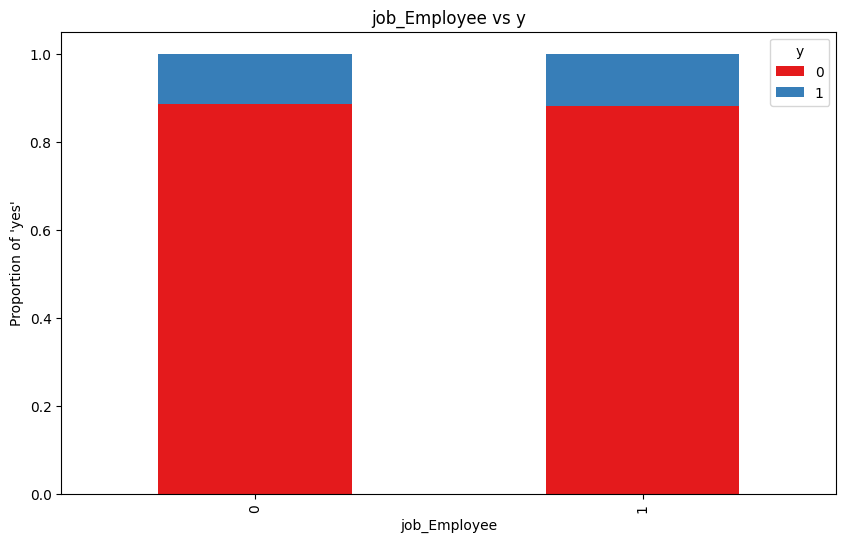

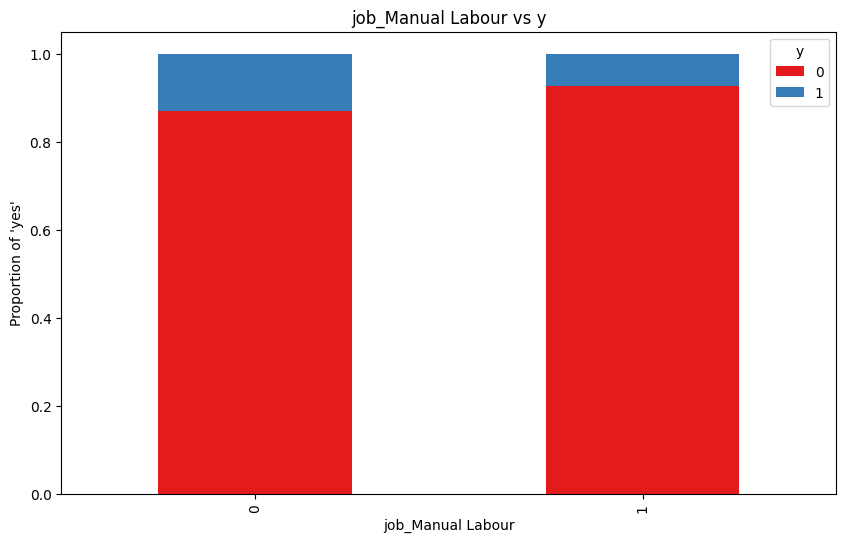

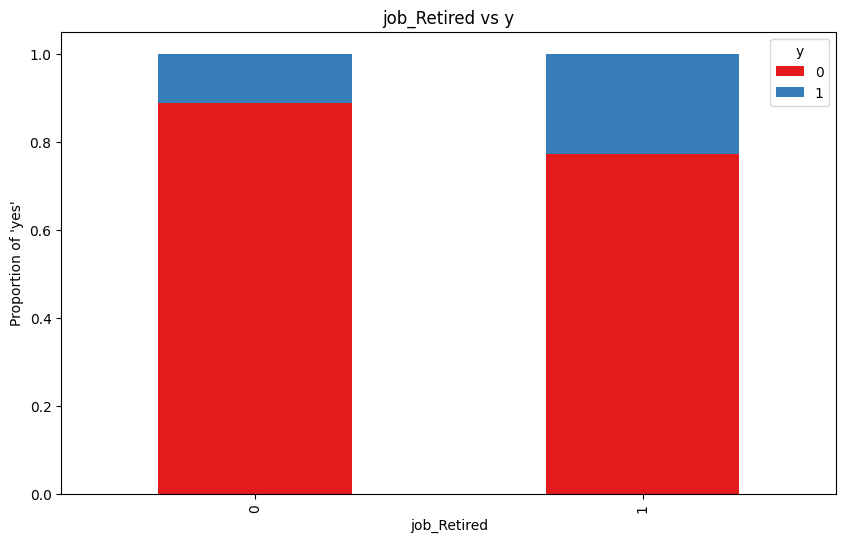

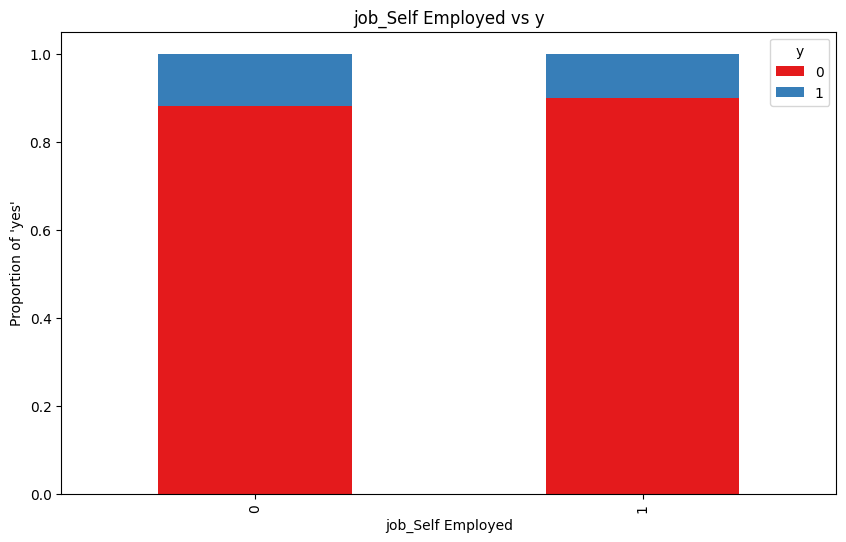

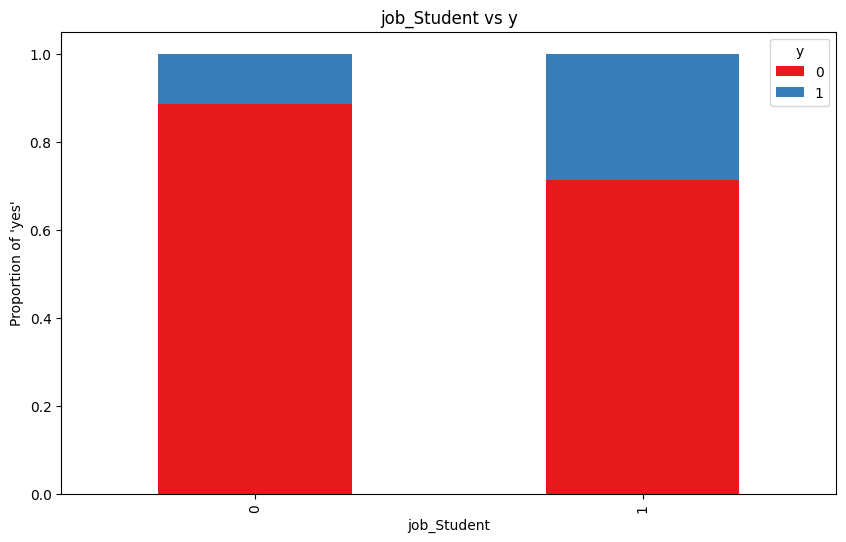

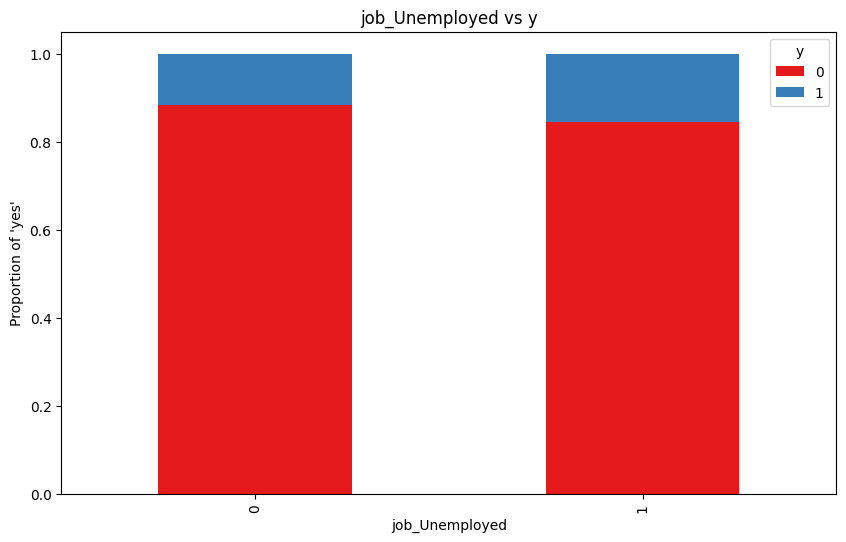

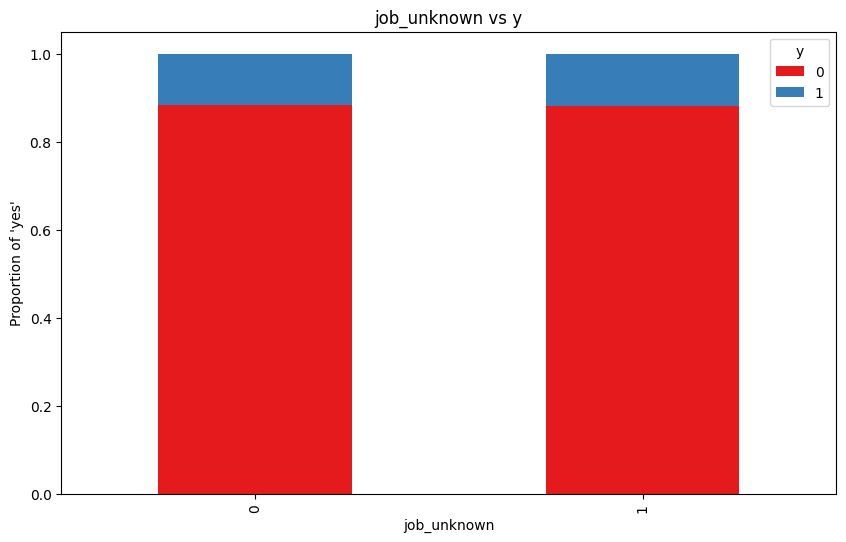

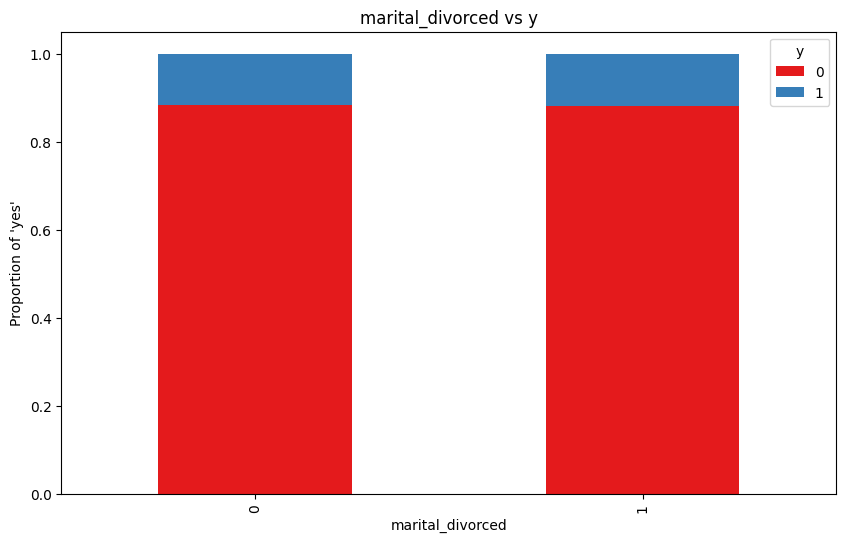

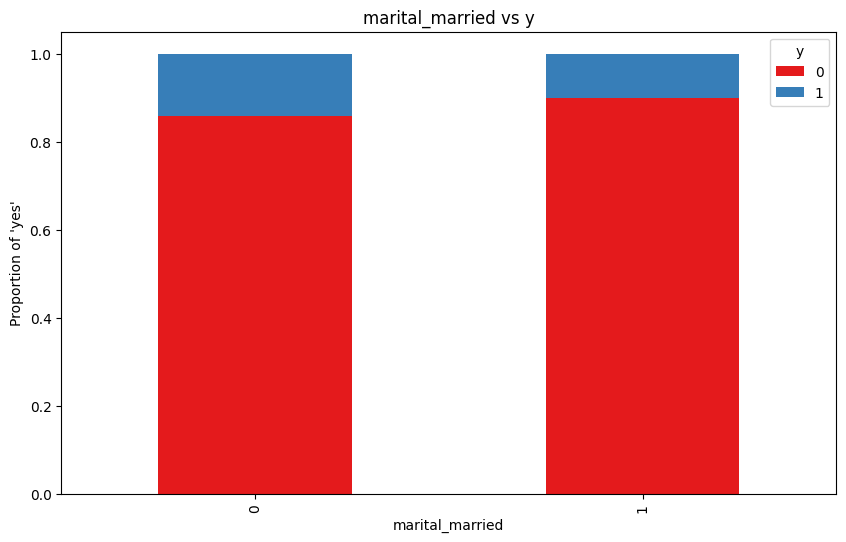

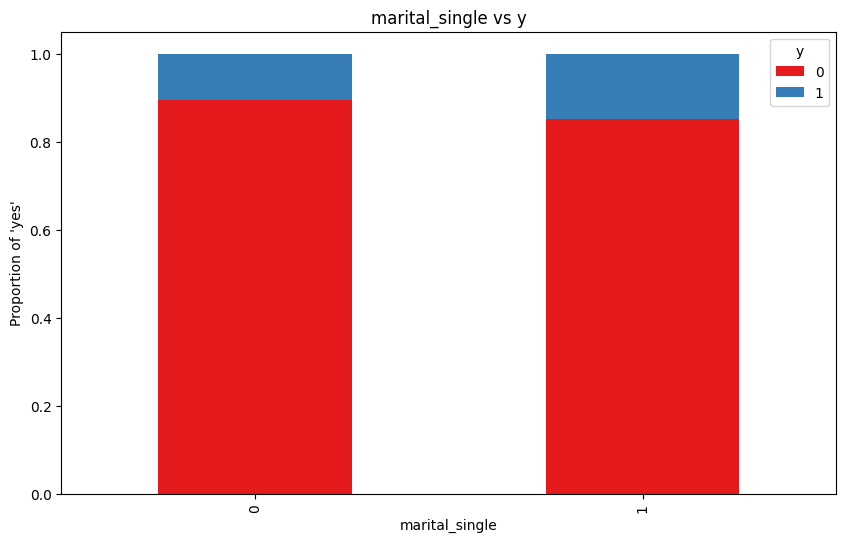

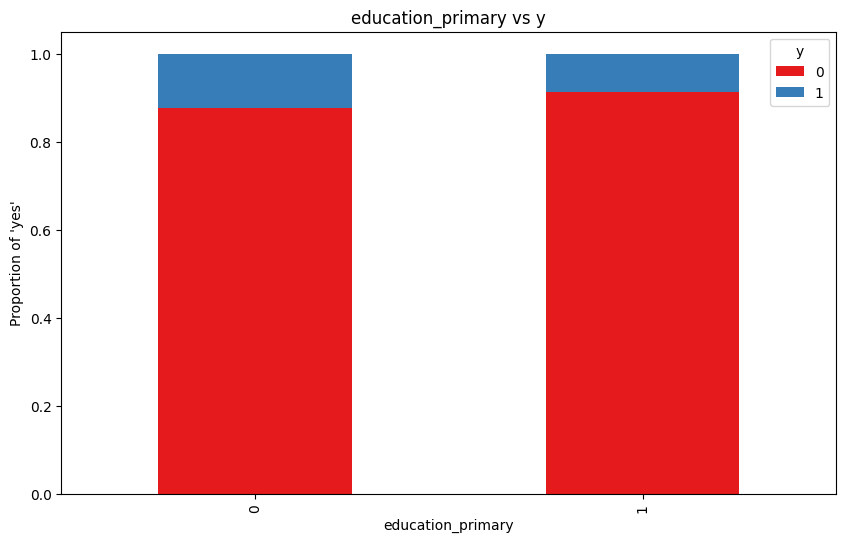

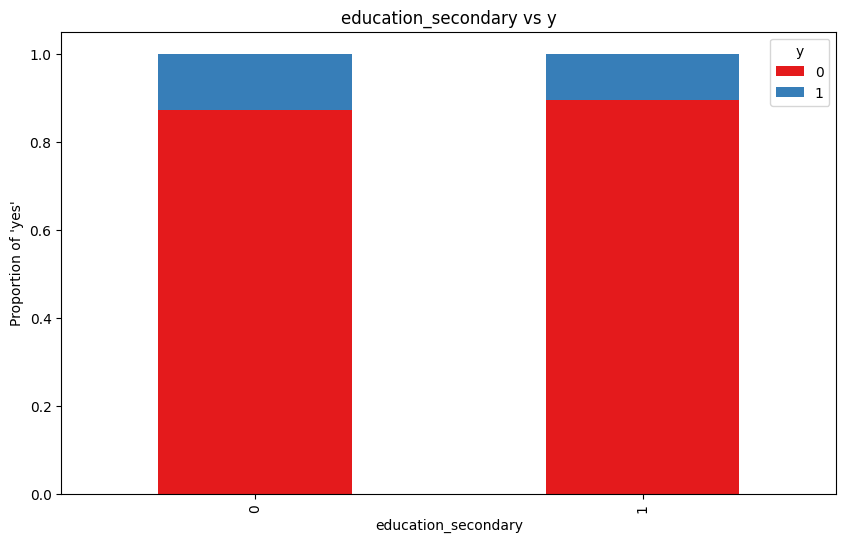

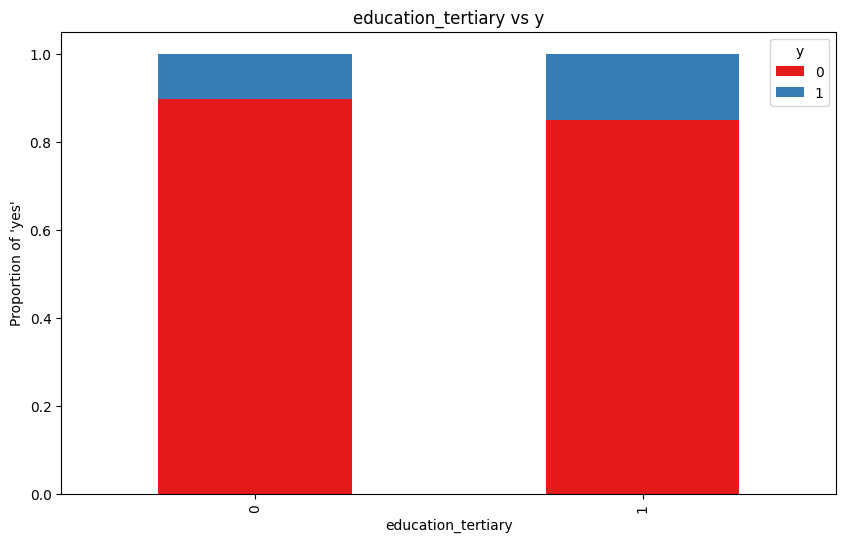

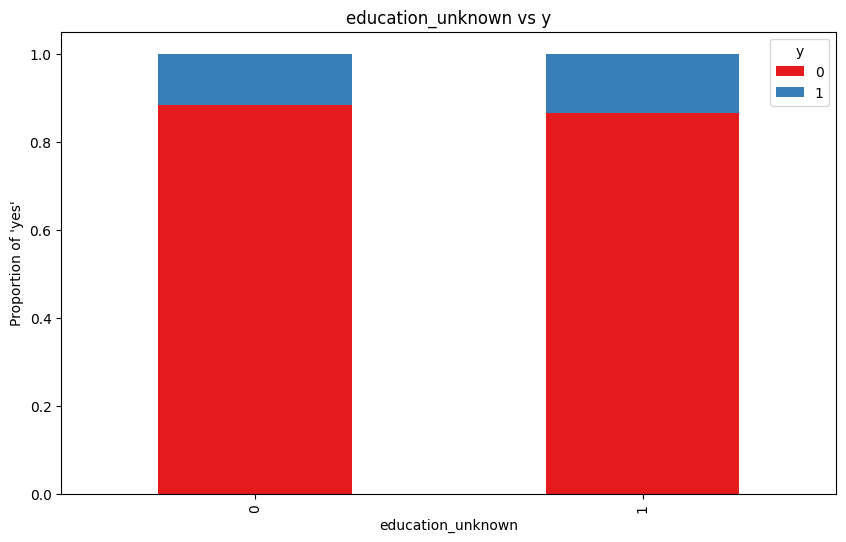

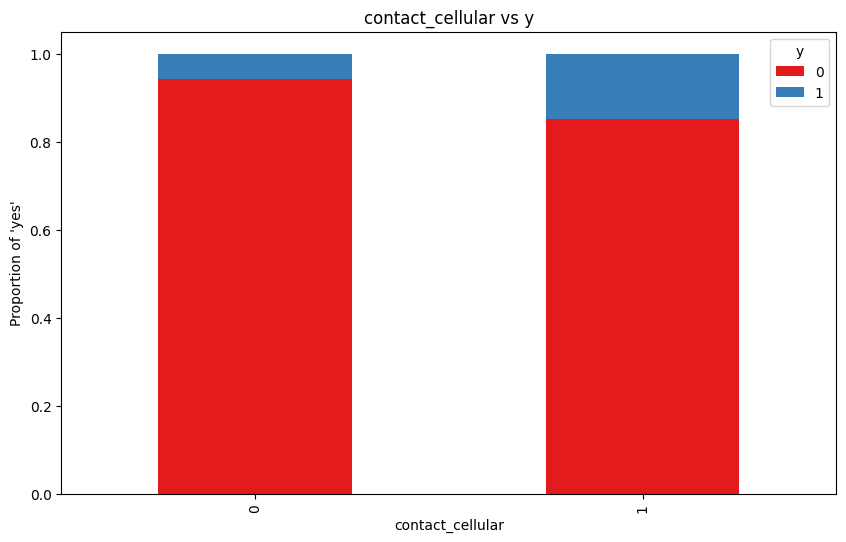

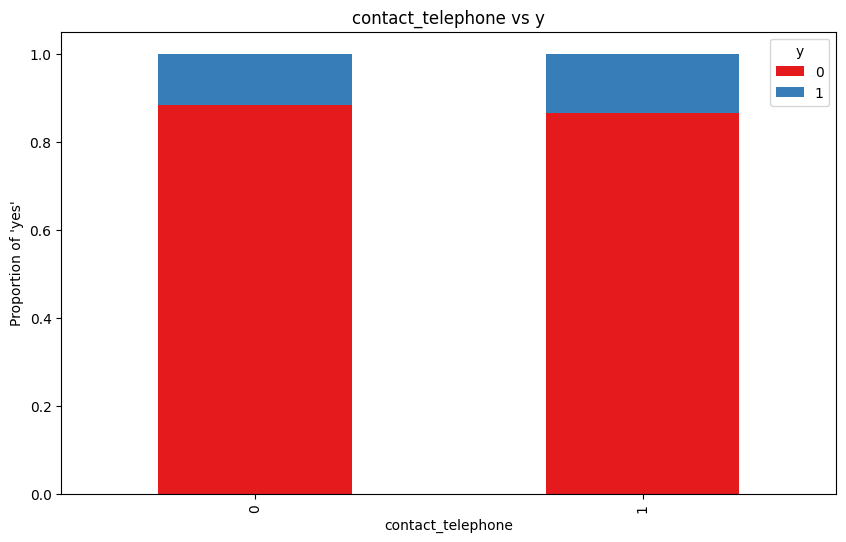

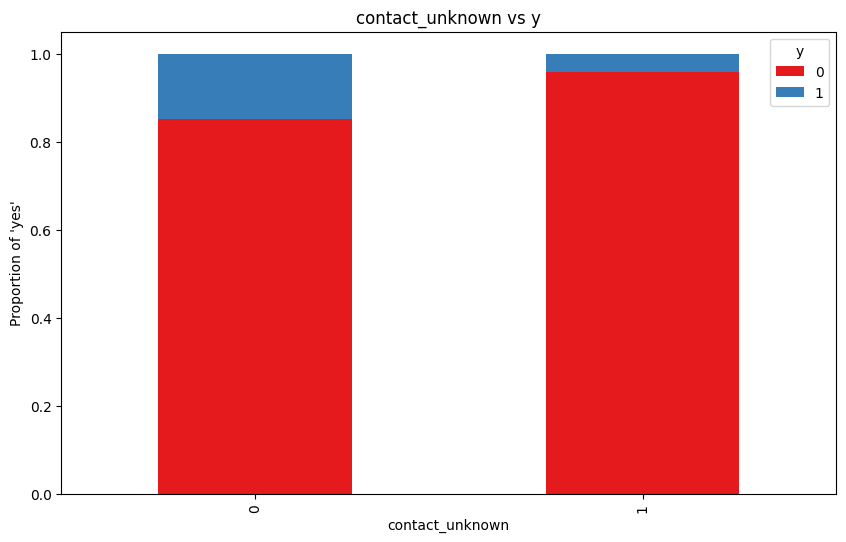

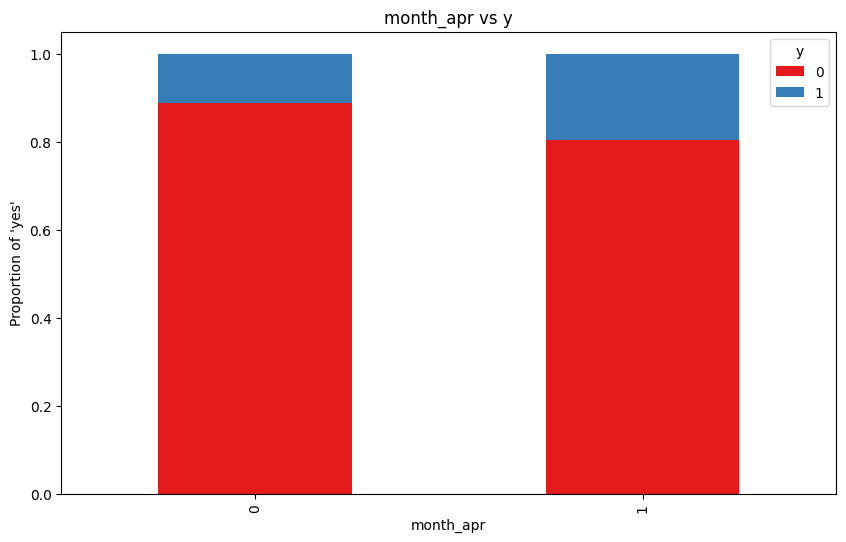

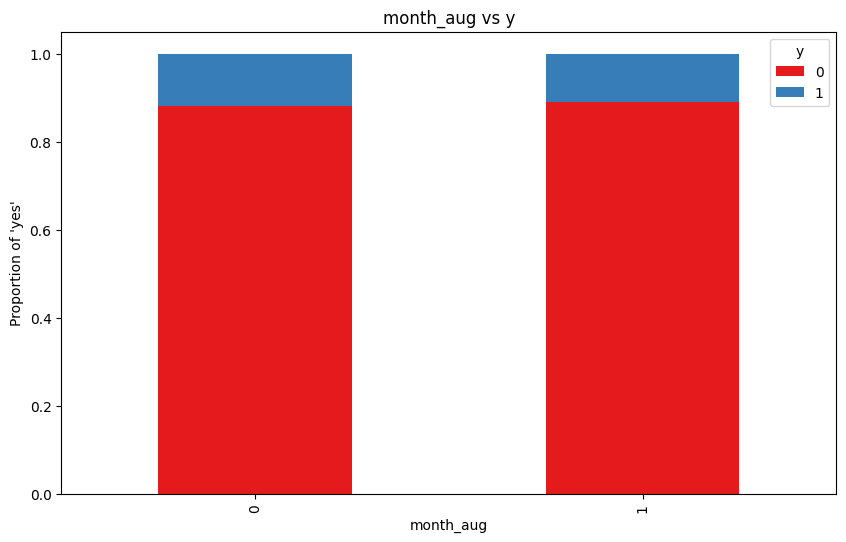

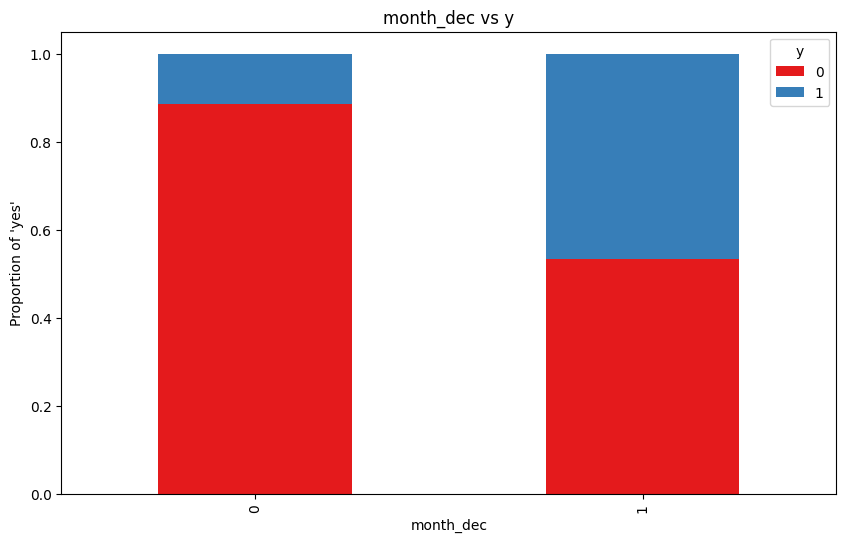

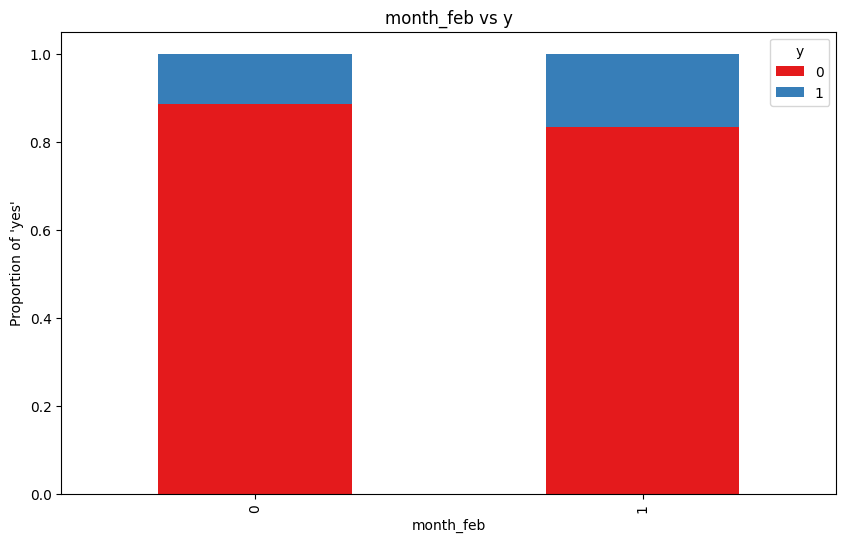

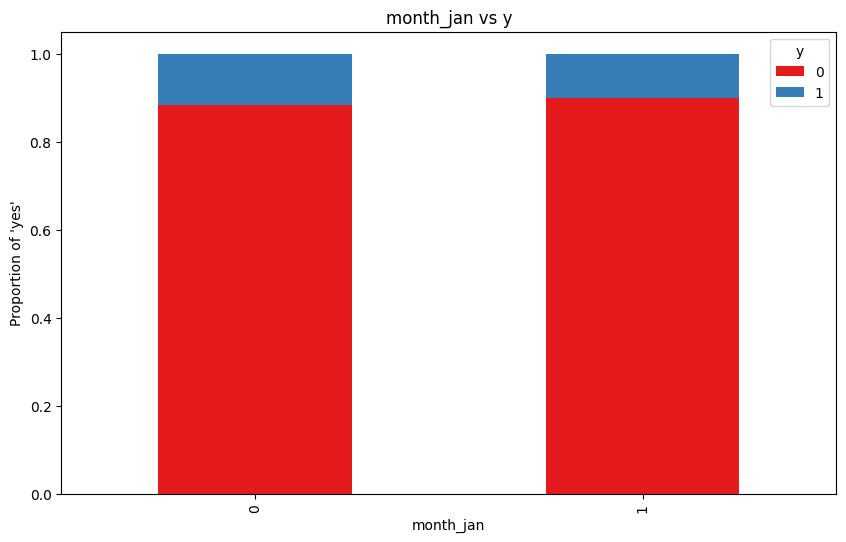

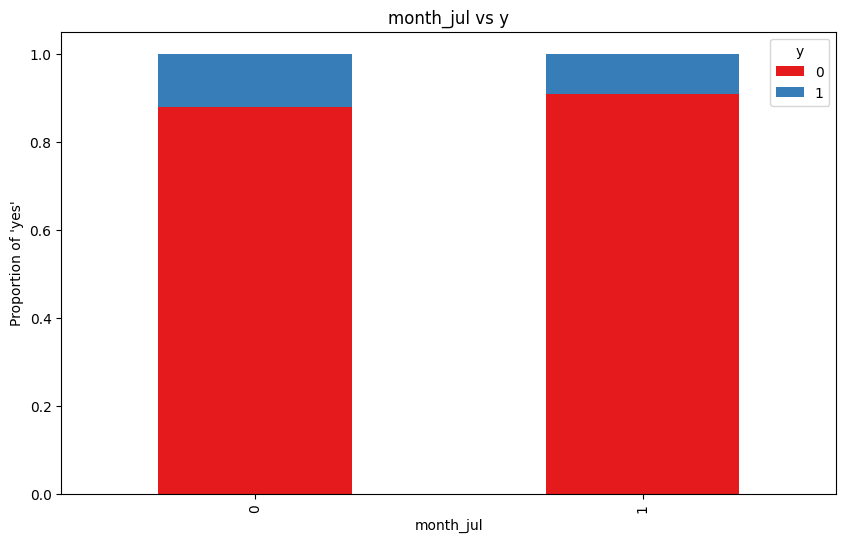

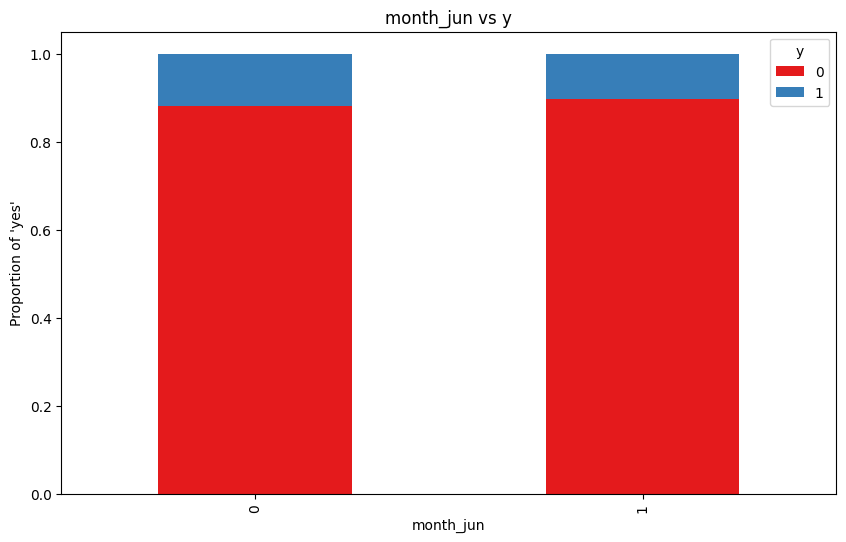

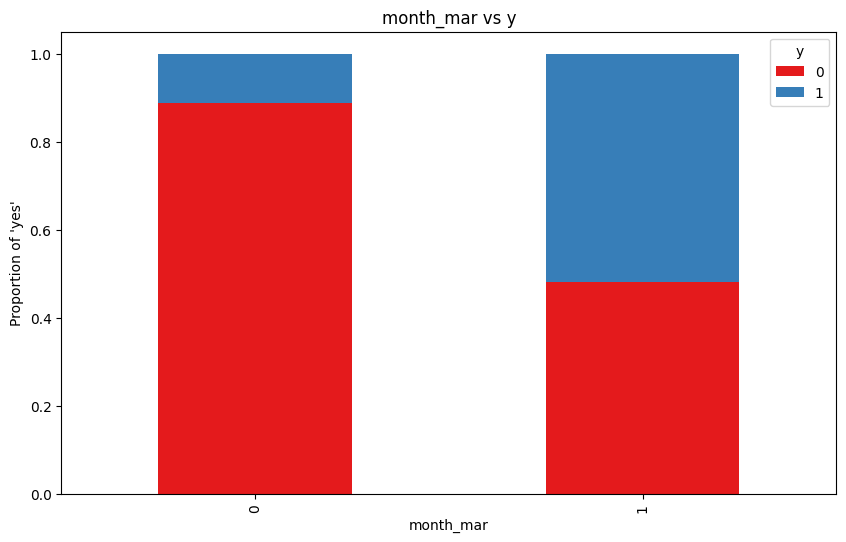

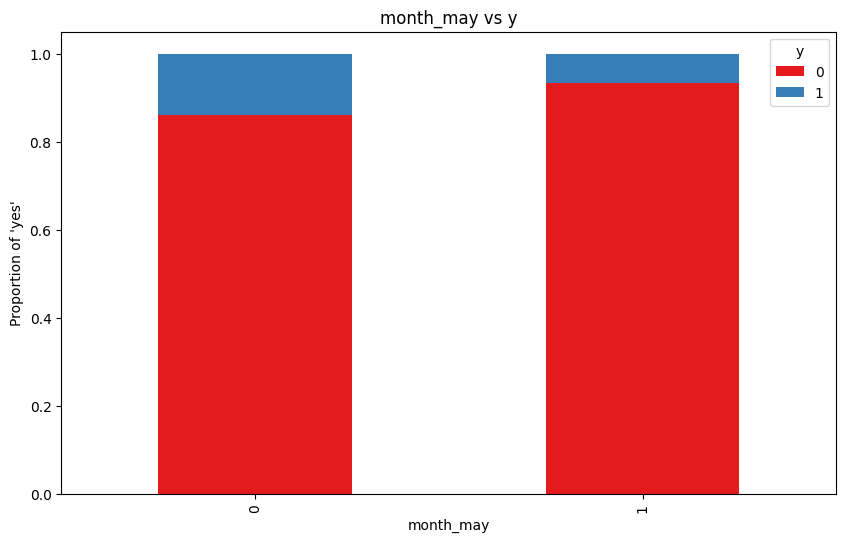

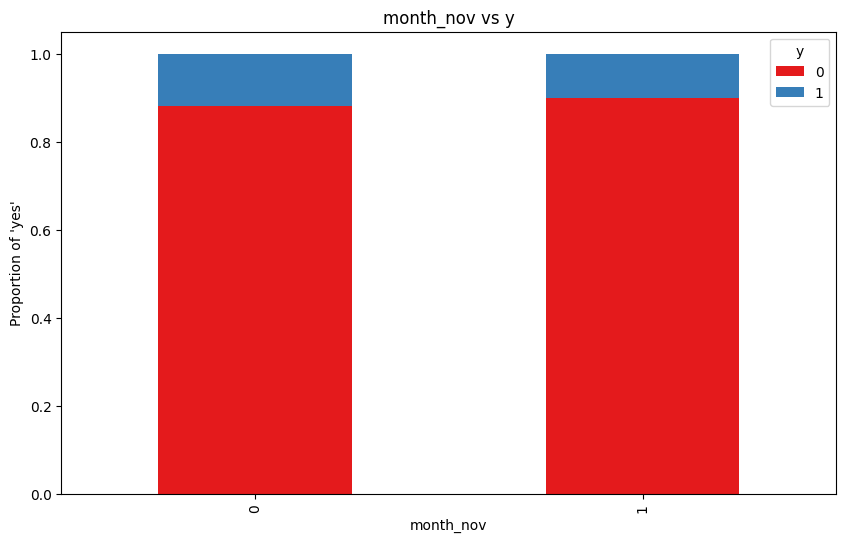

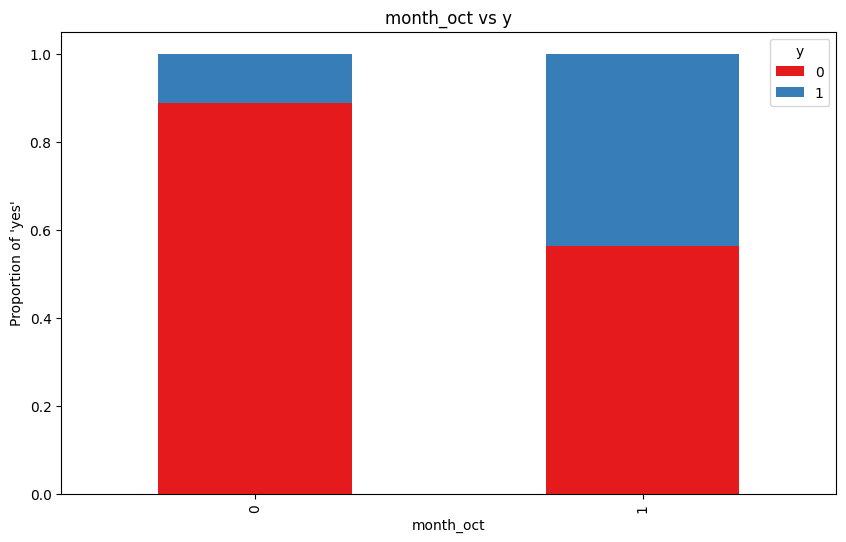

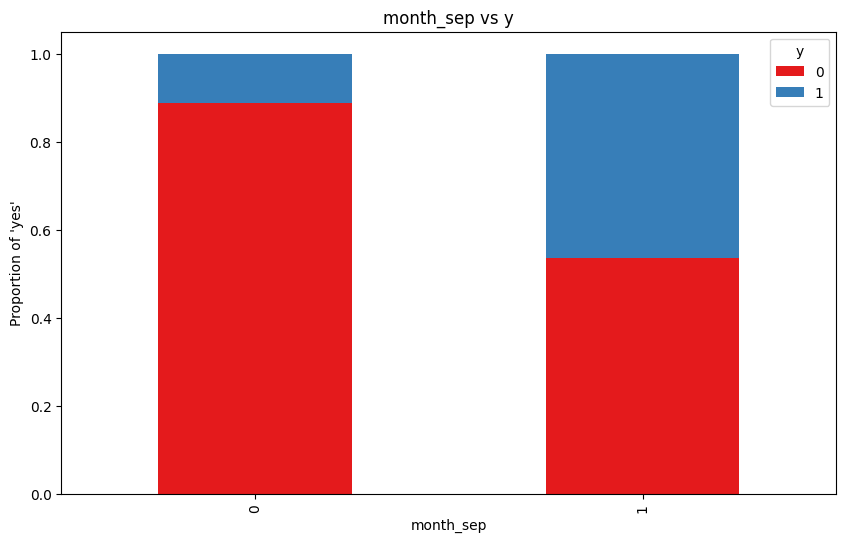

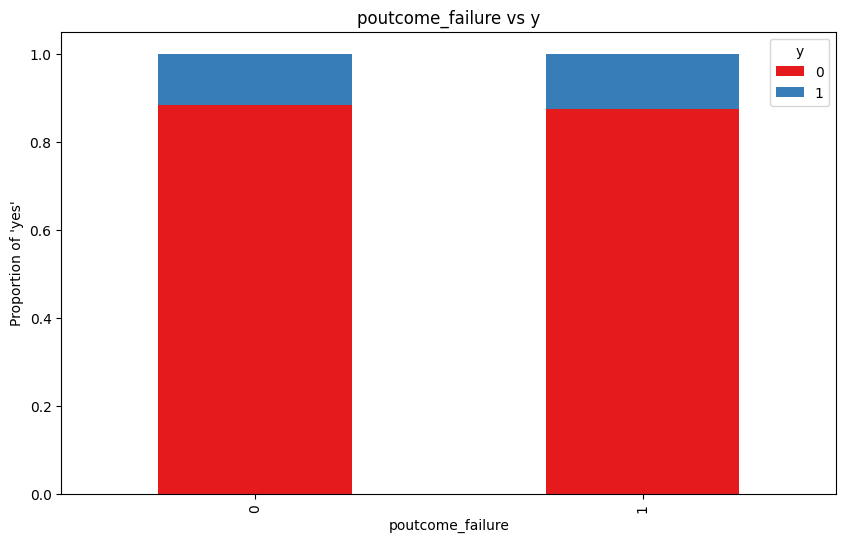

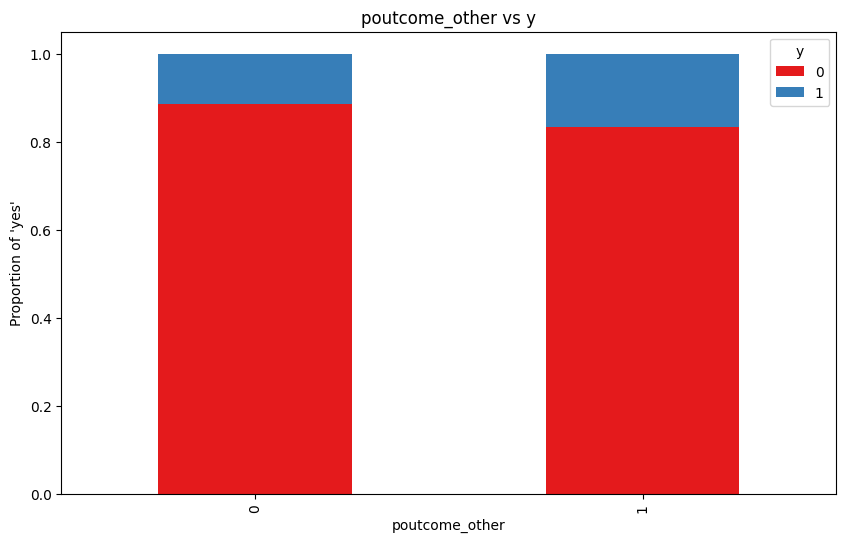

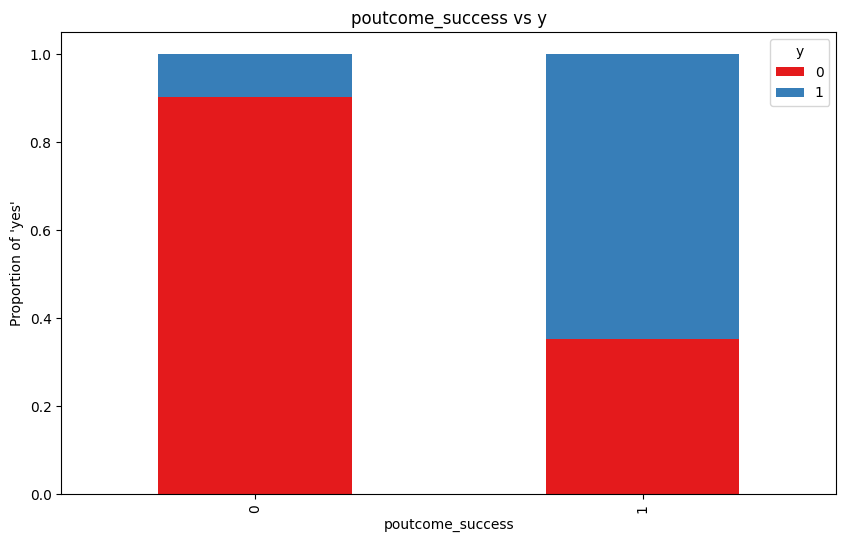

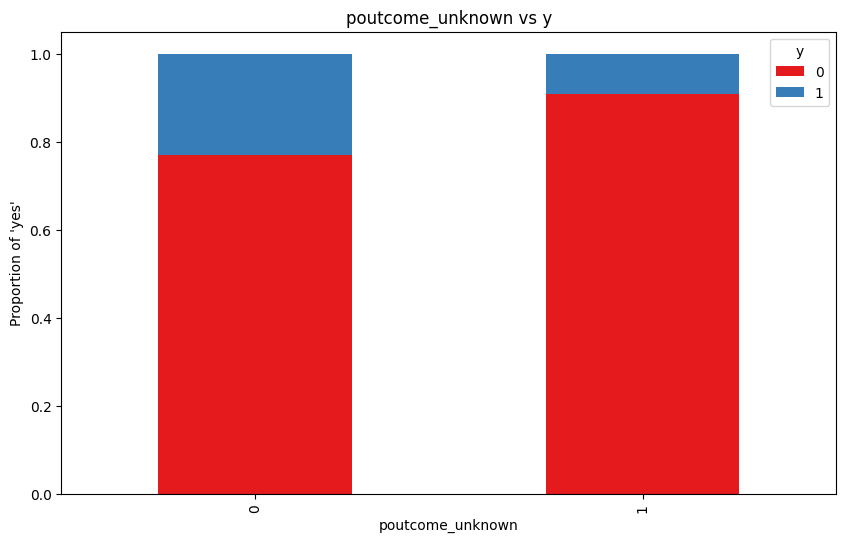

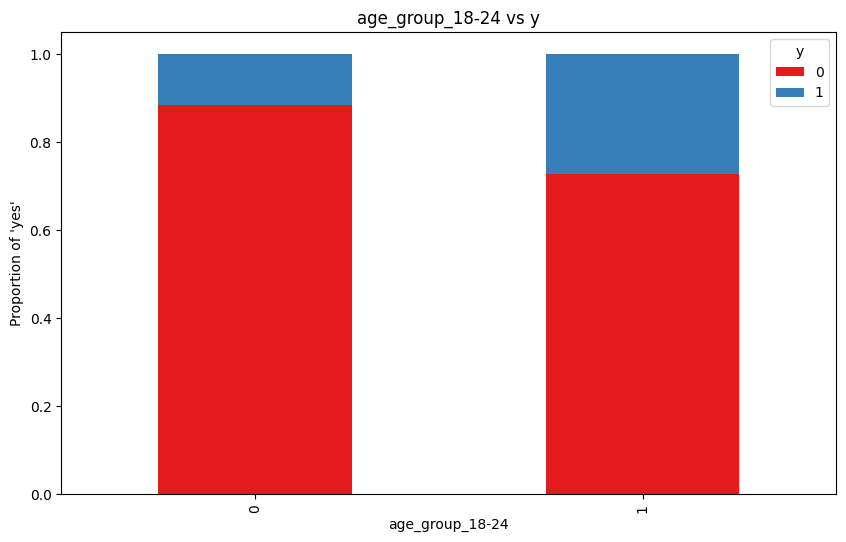

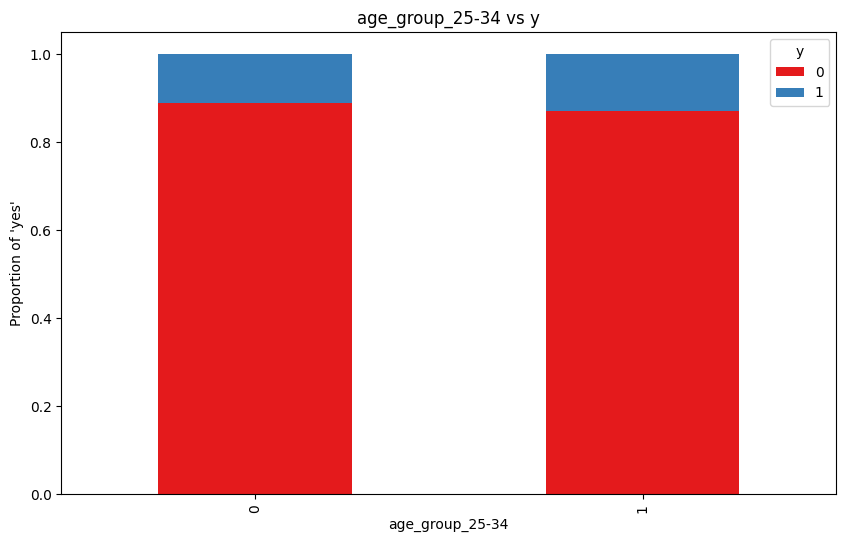

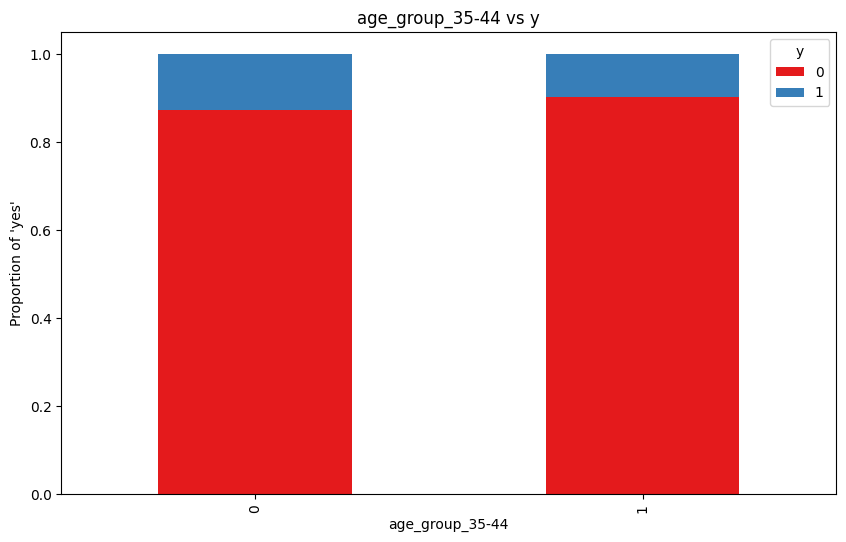

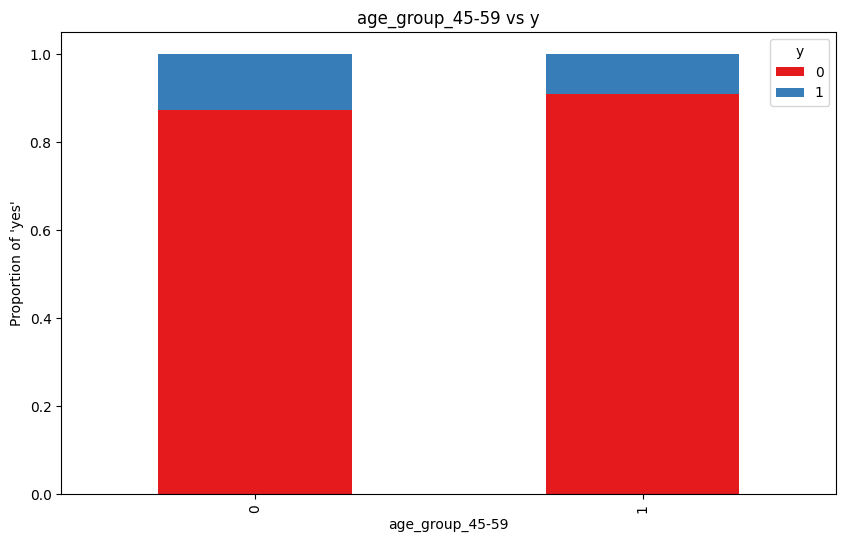

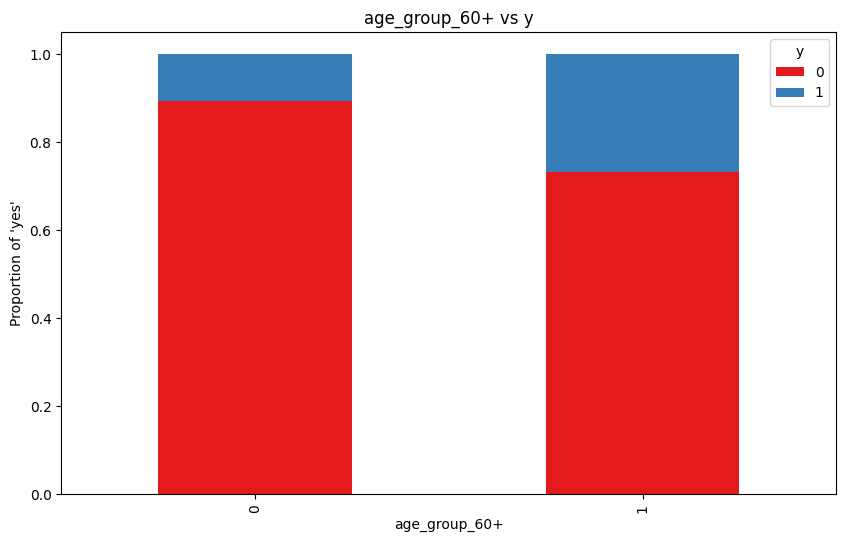

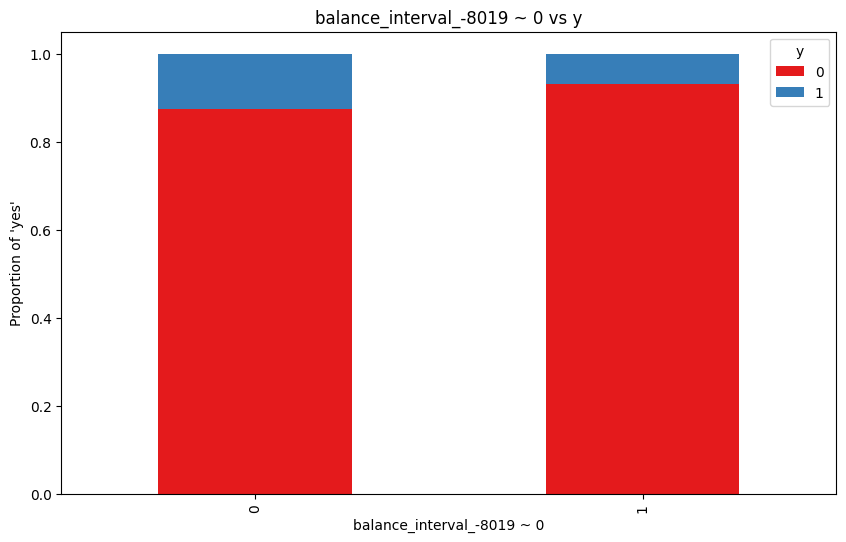

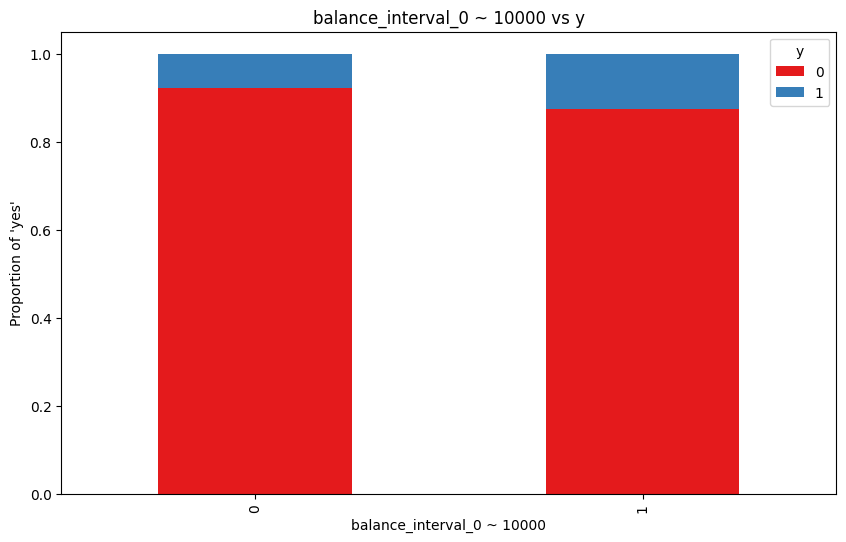

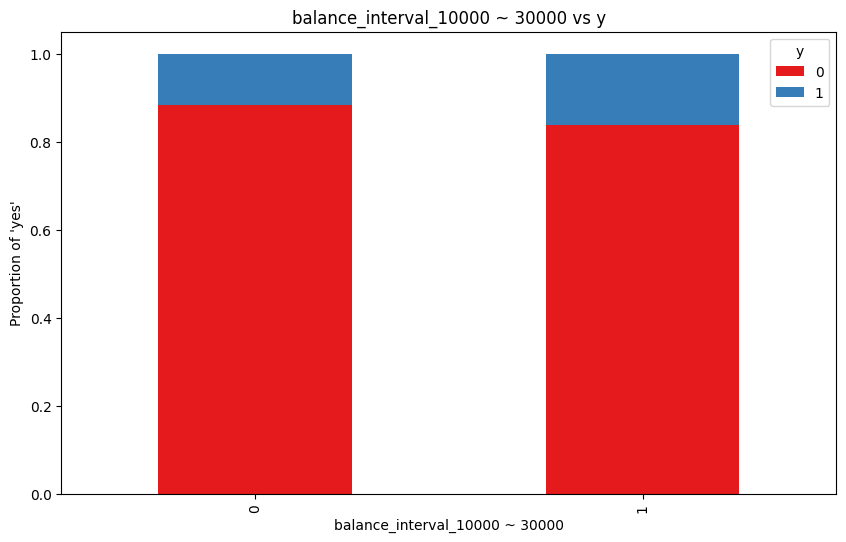

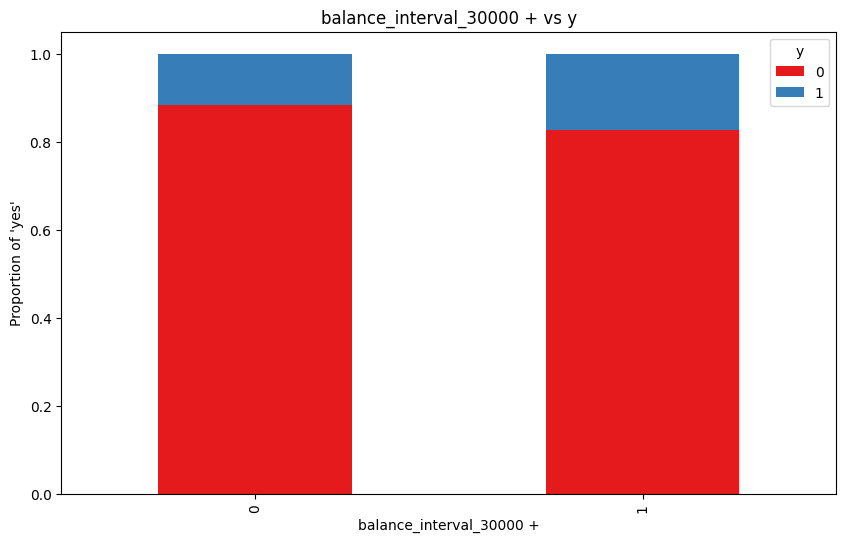

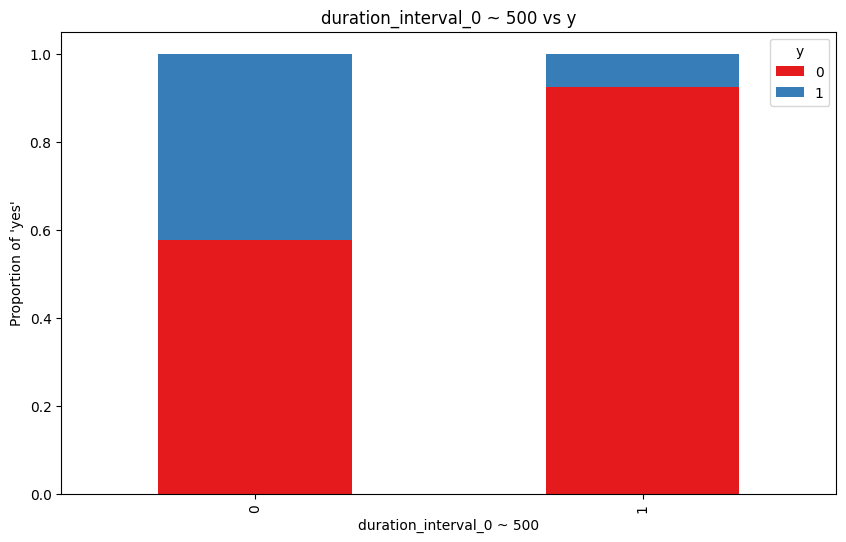

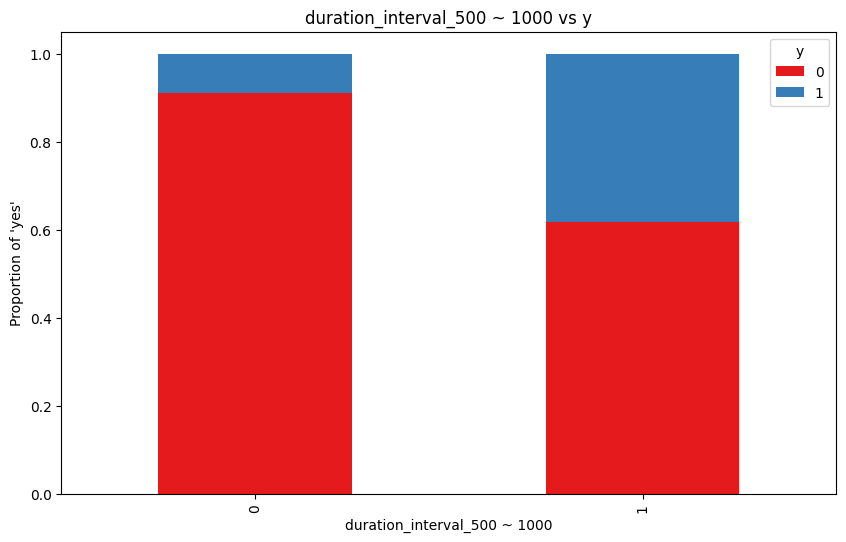

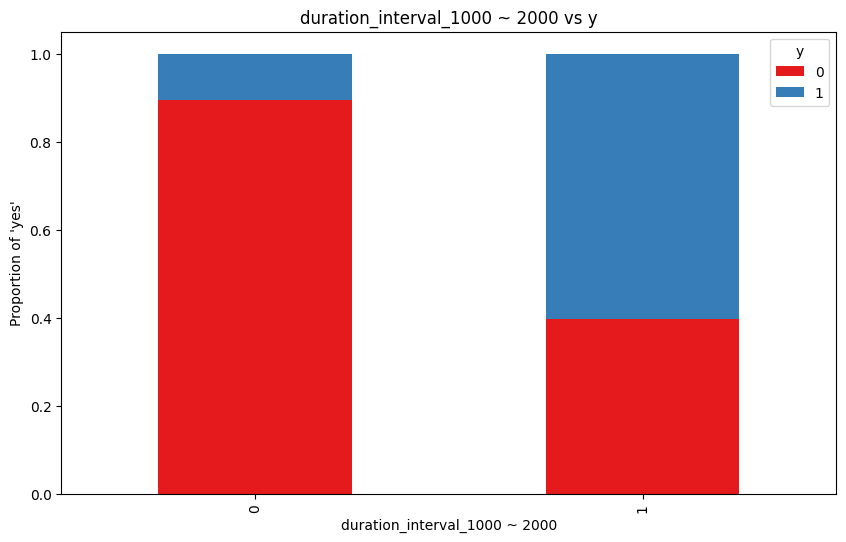

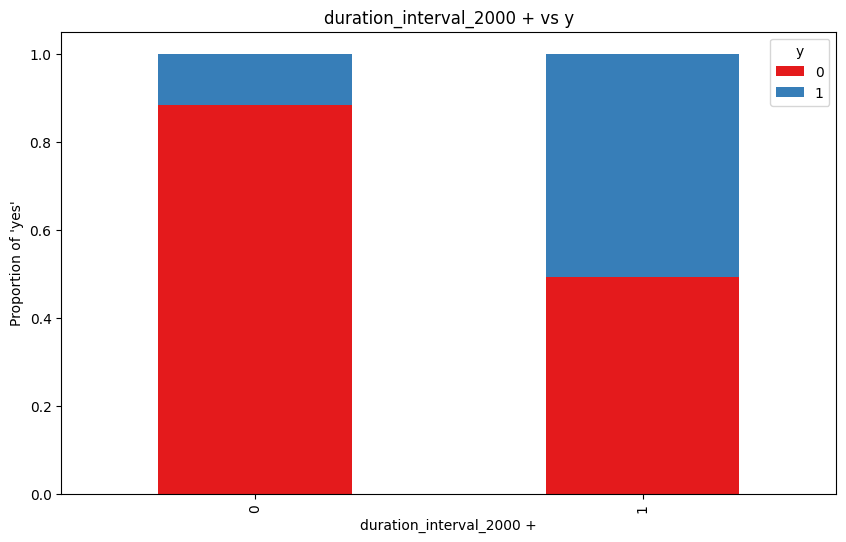

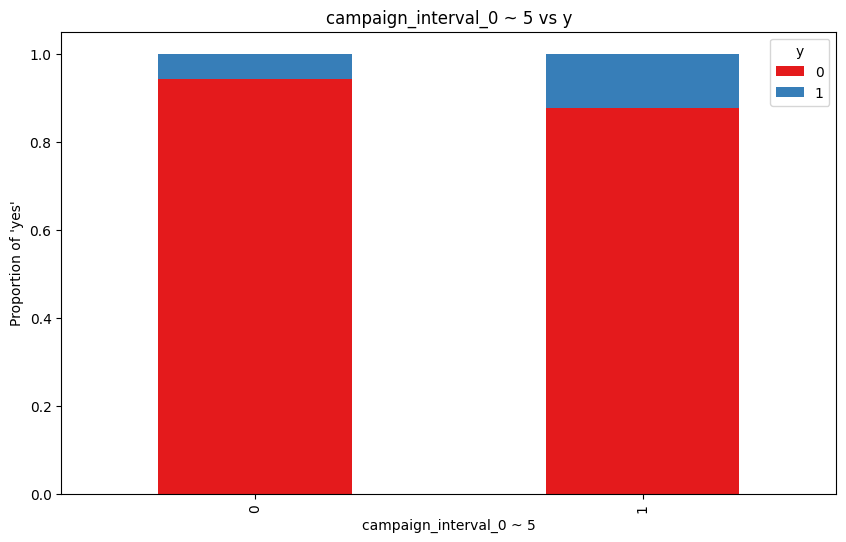

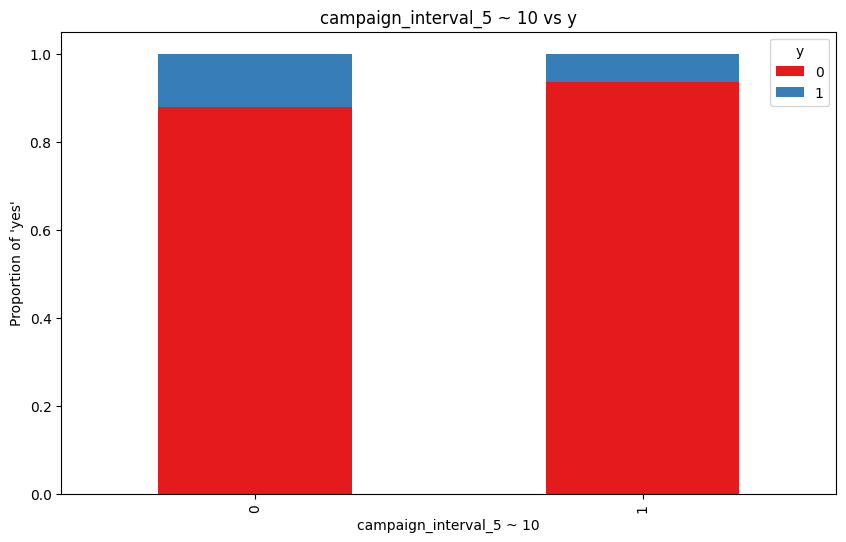

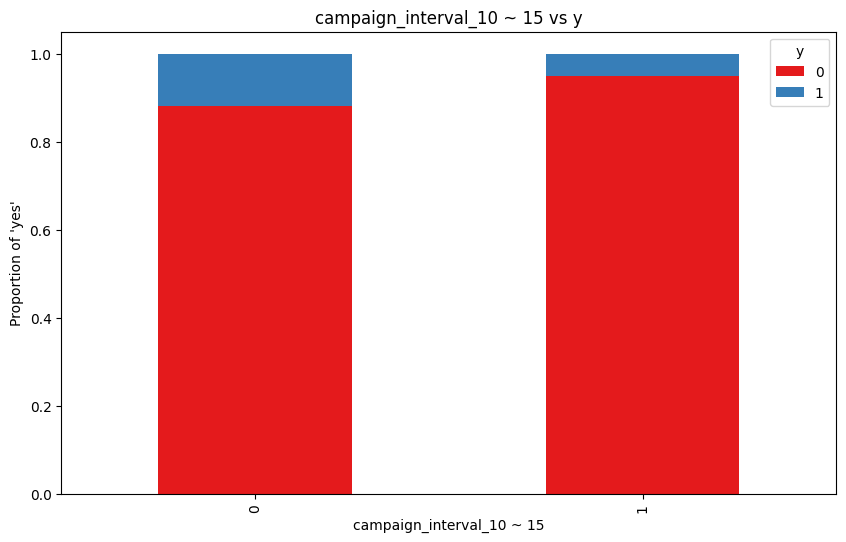

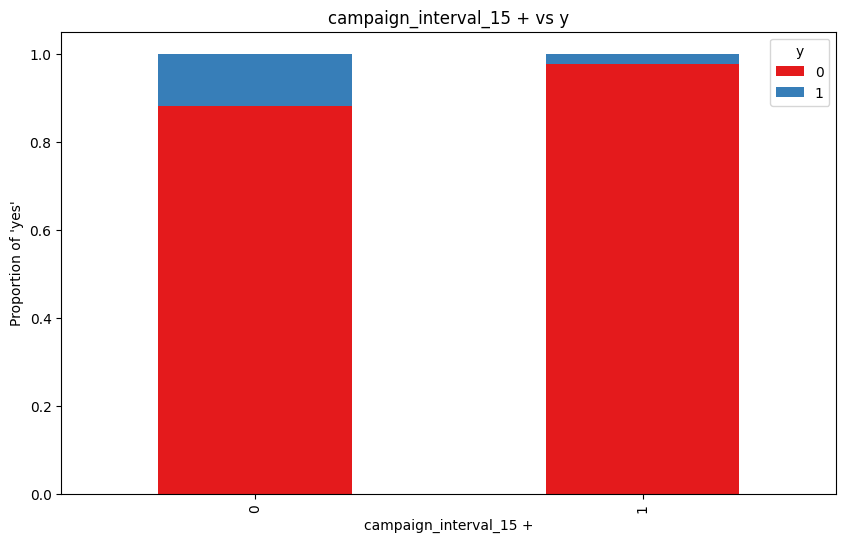

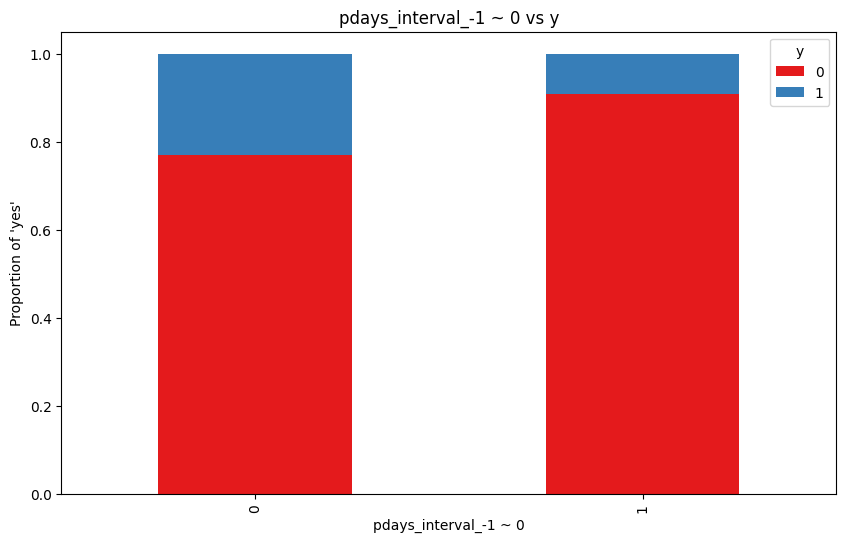

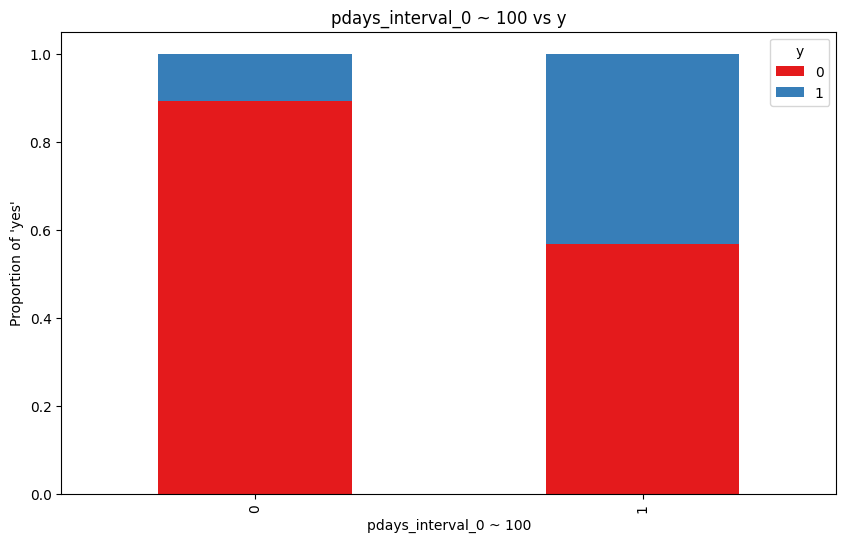

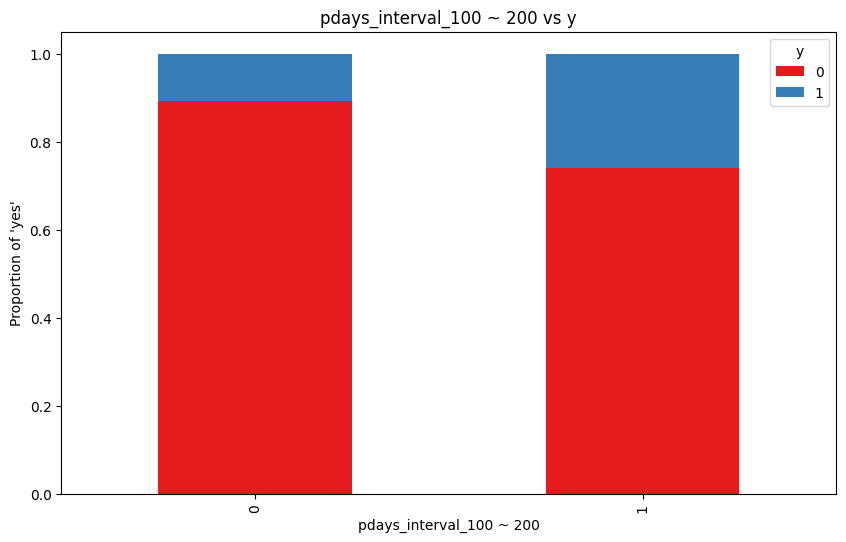

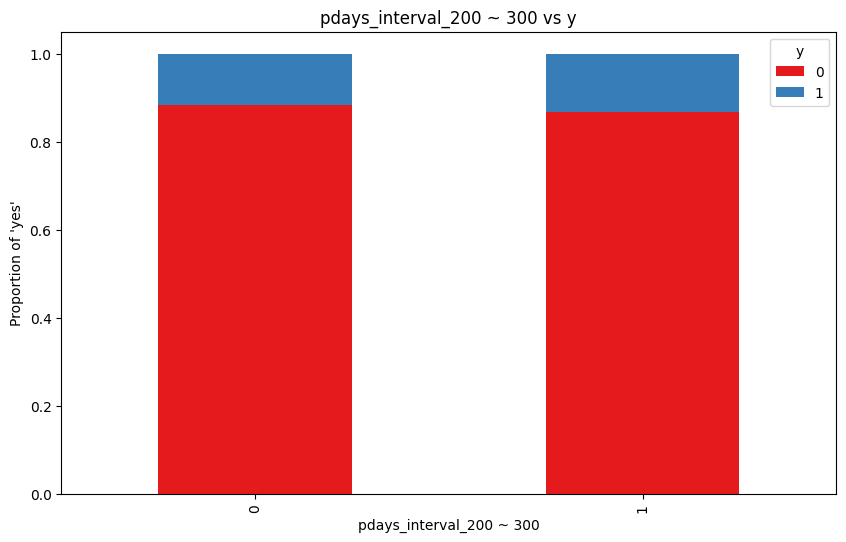

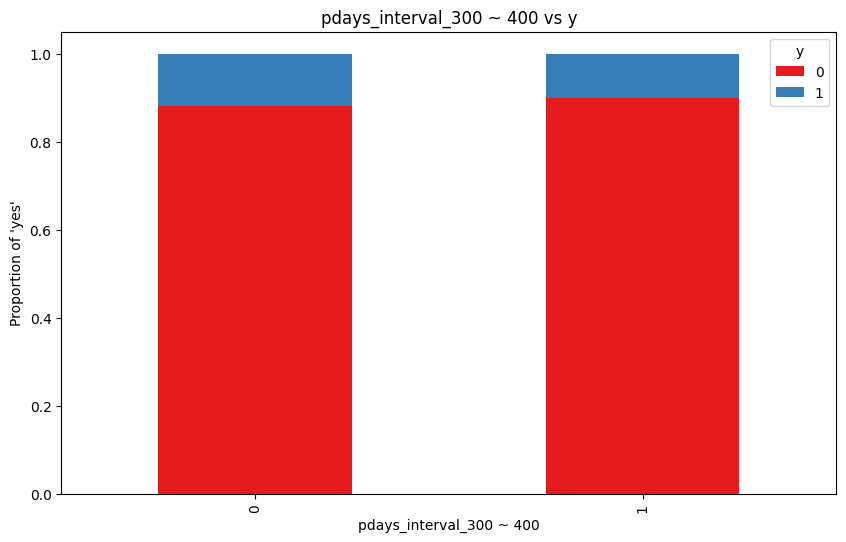

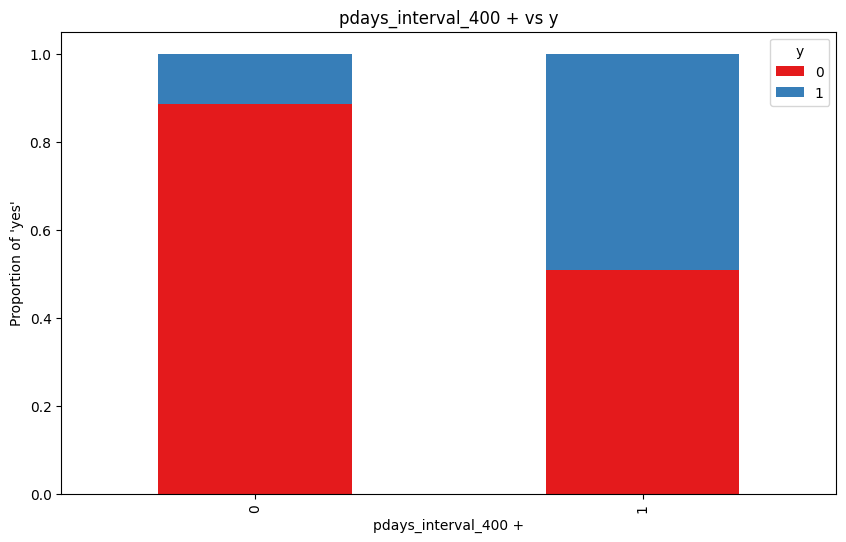

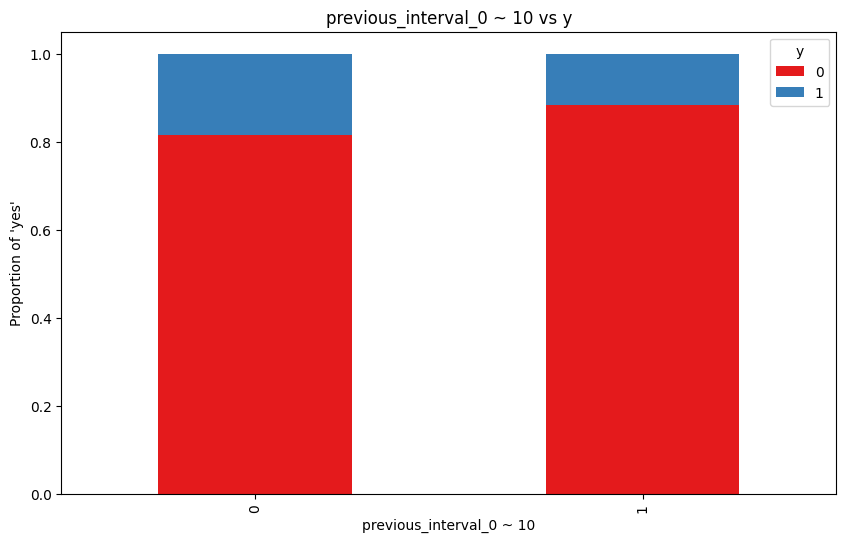

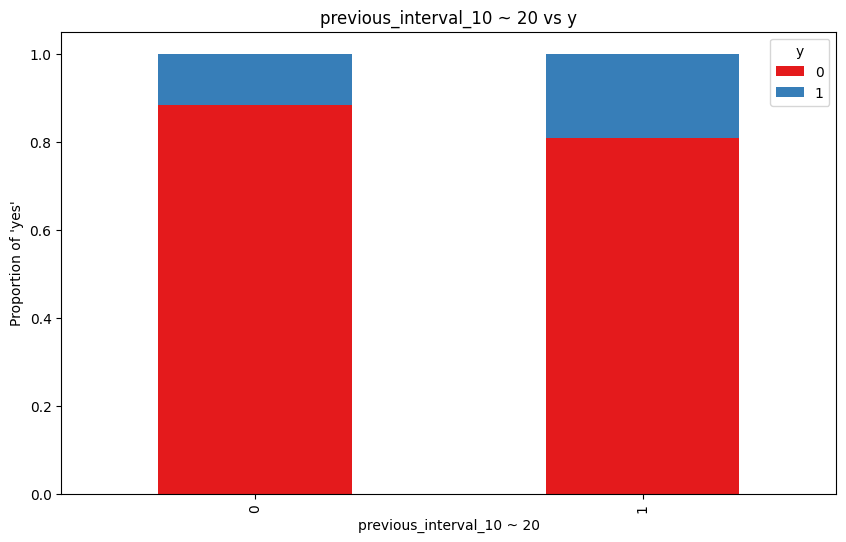

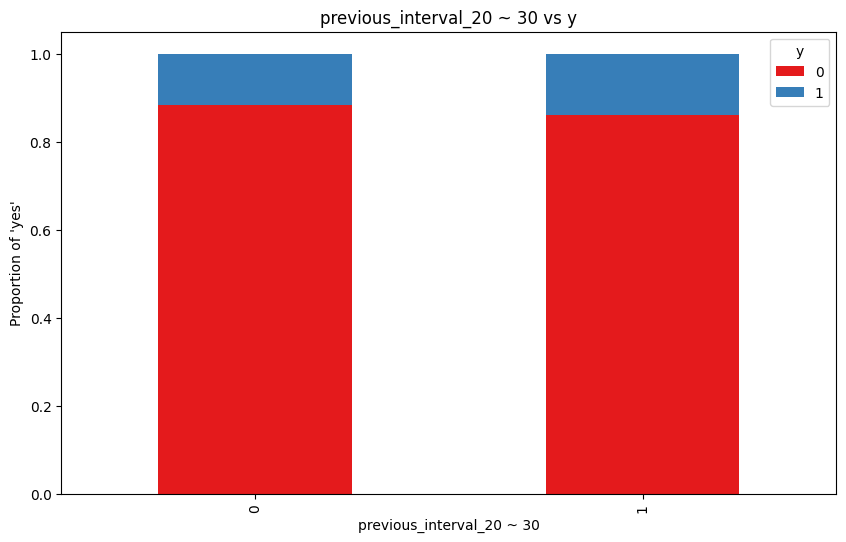

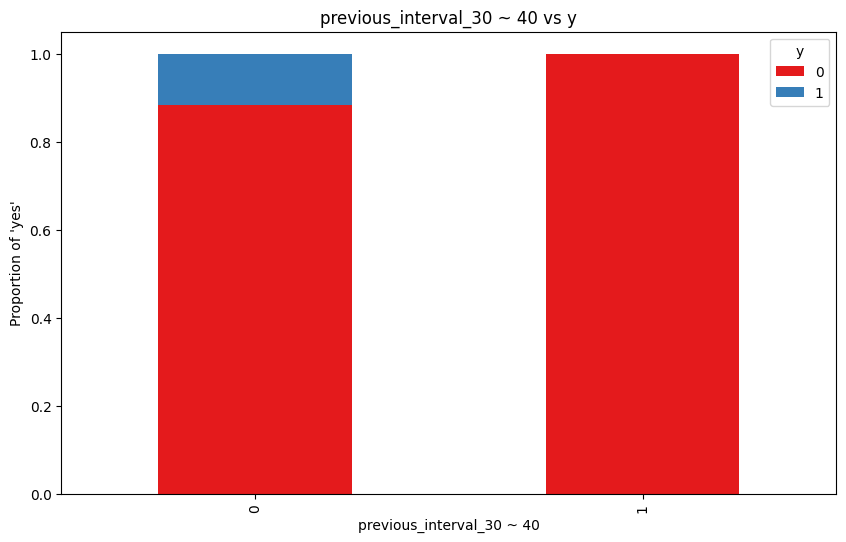

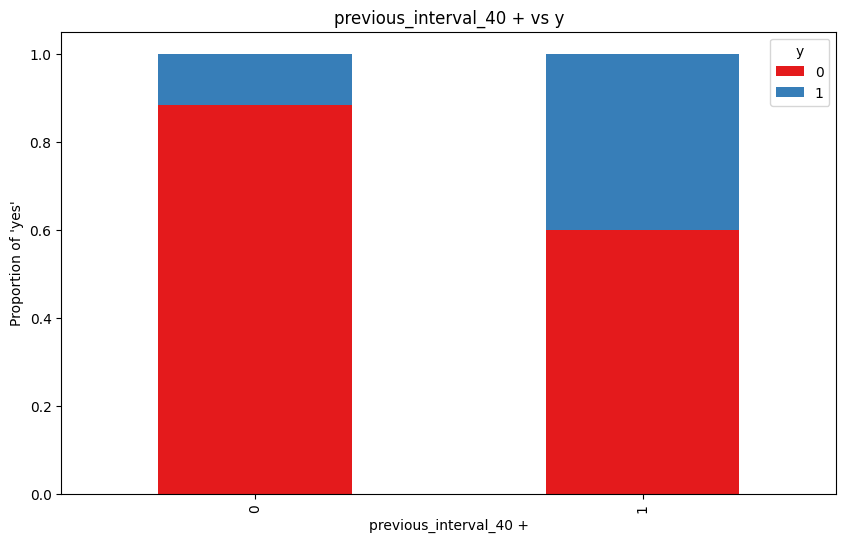

In [35]:
# Bivariate analysis with the target variable 'y' using stacked bar plots
def bivariate_analysis(data, target_variable):

    variables = ['default', 'housing', 'loan', 'job_Employee', 'job_Manual Labour', 'job_Retired',
                       'job_Self Employed', 'job_Student', 'job_Unemployed', 'job_unknown', 'marital_divorced',
                       'marital_married', 'marital_single', 'education_primary', 'education_secondary',
                       'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone',
                       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
                       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
                       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age_group_18-24', 'age_group_25-34',
                       'age_group_35-44', 'age_group_45-59', 'age_group_60+', 'balance_interval_-8019 ~ 0',
                       'balance_interval_0 ~ 10000', 'balance_interval_10000 ~ 30000', 'balance_interval_30000 +',
                       'duration_interval_0 ~ 500', 'duration_interval_500 ~ 1000', 'duration_interval_1000 ~ 2000',
                       'duration_interval_2000 +', 'campaign_interval_0 ~ 5', 'campaign_interval_5 ~ 10',
                       'campaign_interval_10 ~ 15', 'campaign_interval_15 +', 'pdays_interval_-1 ~ 0',
                       'pdays_interval_0 ~ 100', 'pdays_interval_100 ~ 200', 'pdays_interval_200 ~ 300',
                       'pdays_interval_300 ~ 400', 'pdays_interval_400 +', 'previous_interval_0 ~ 10',
                       'previous_interval_10 ~ 20', 'previous_interval_20 ~ 30', 'previous_interval_30 ~ 40',
                       'previous_interval_40 +']

    for feature in variables:

        crosstab = pd.crosstab(data[feature], data[target_variable])

        # Calculate the proportion of 'yes' (1) within each category
        crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)

        # Create a stacked bar plot
        sns.set_palette("Set1")
        ax = crosstab.plot(kind="bar", stacked=True, figsize=(10, 6))
        ax.set_title(f"{feature} vs {target_variable}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Proportion of 'yes'")
        plt.show()

bivariate_analysis(bd, "y")

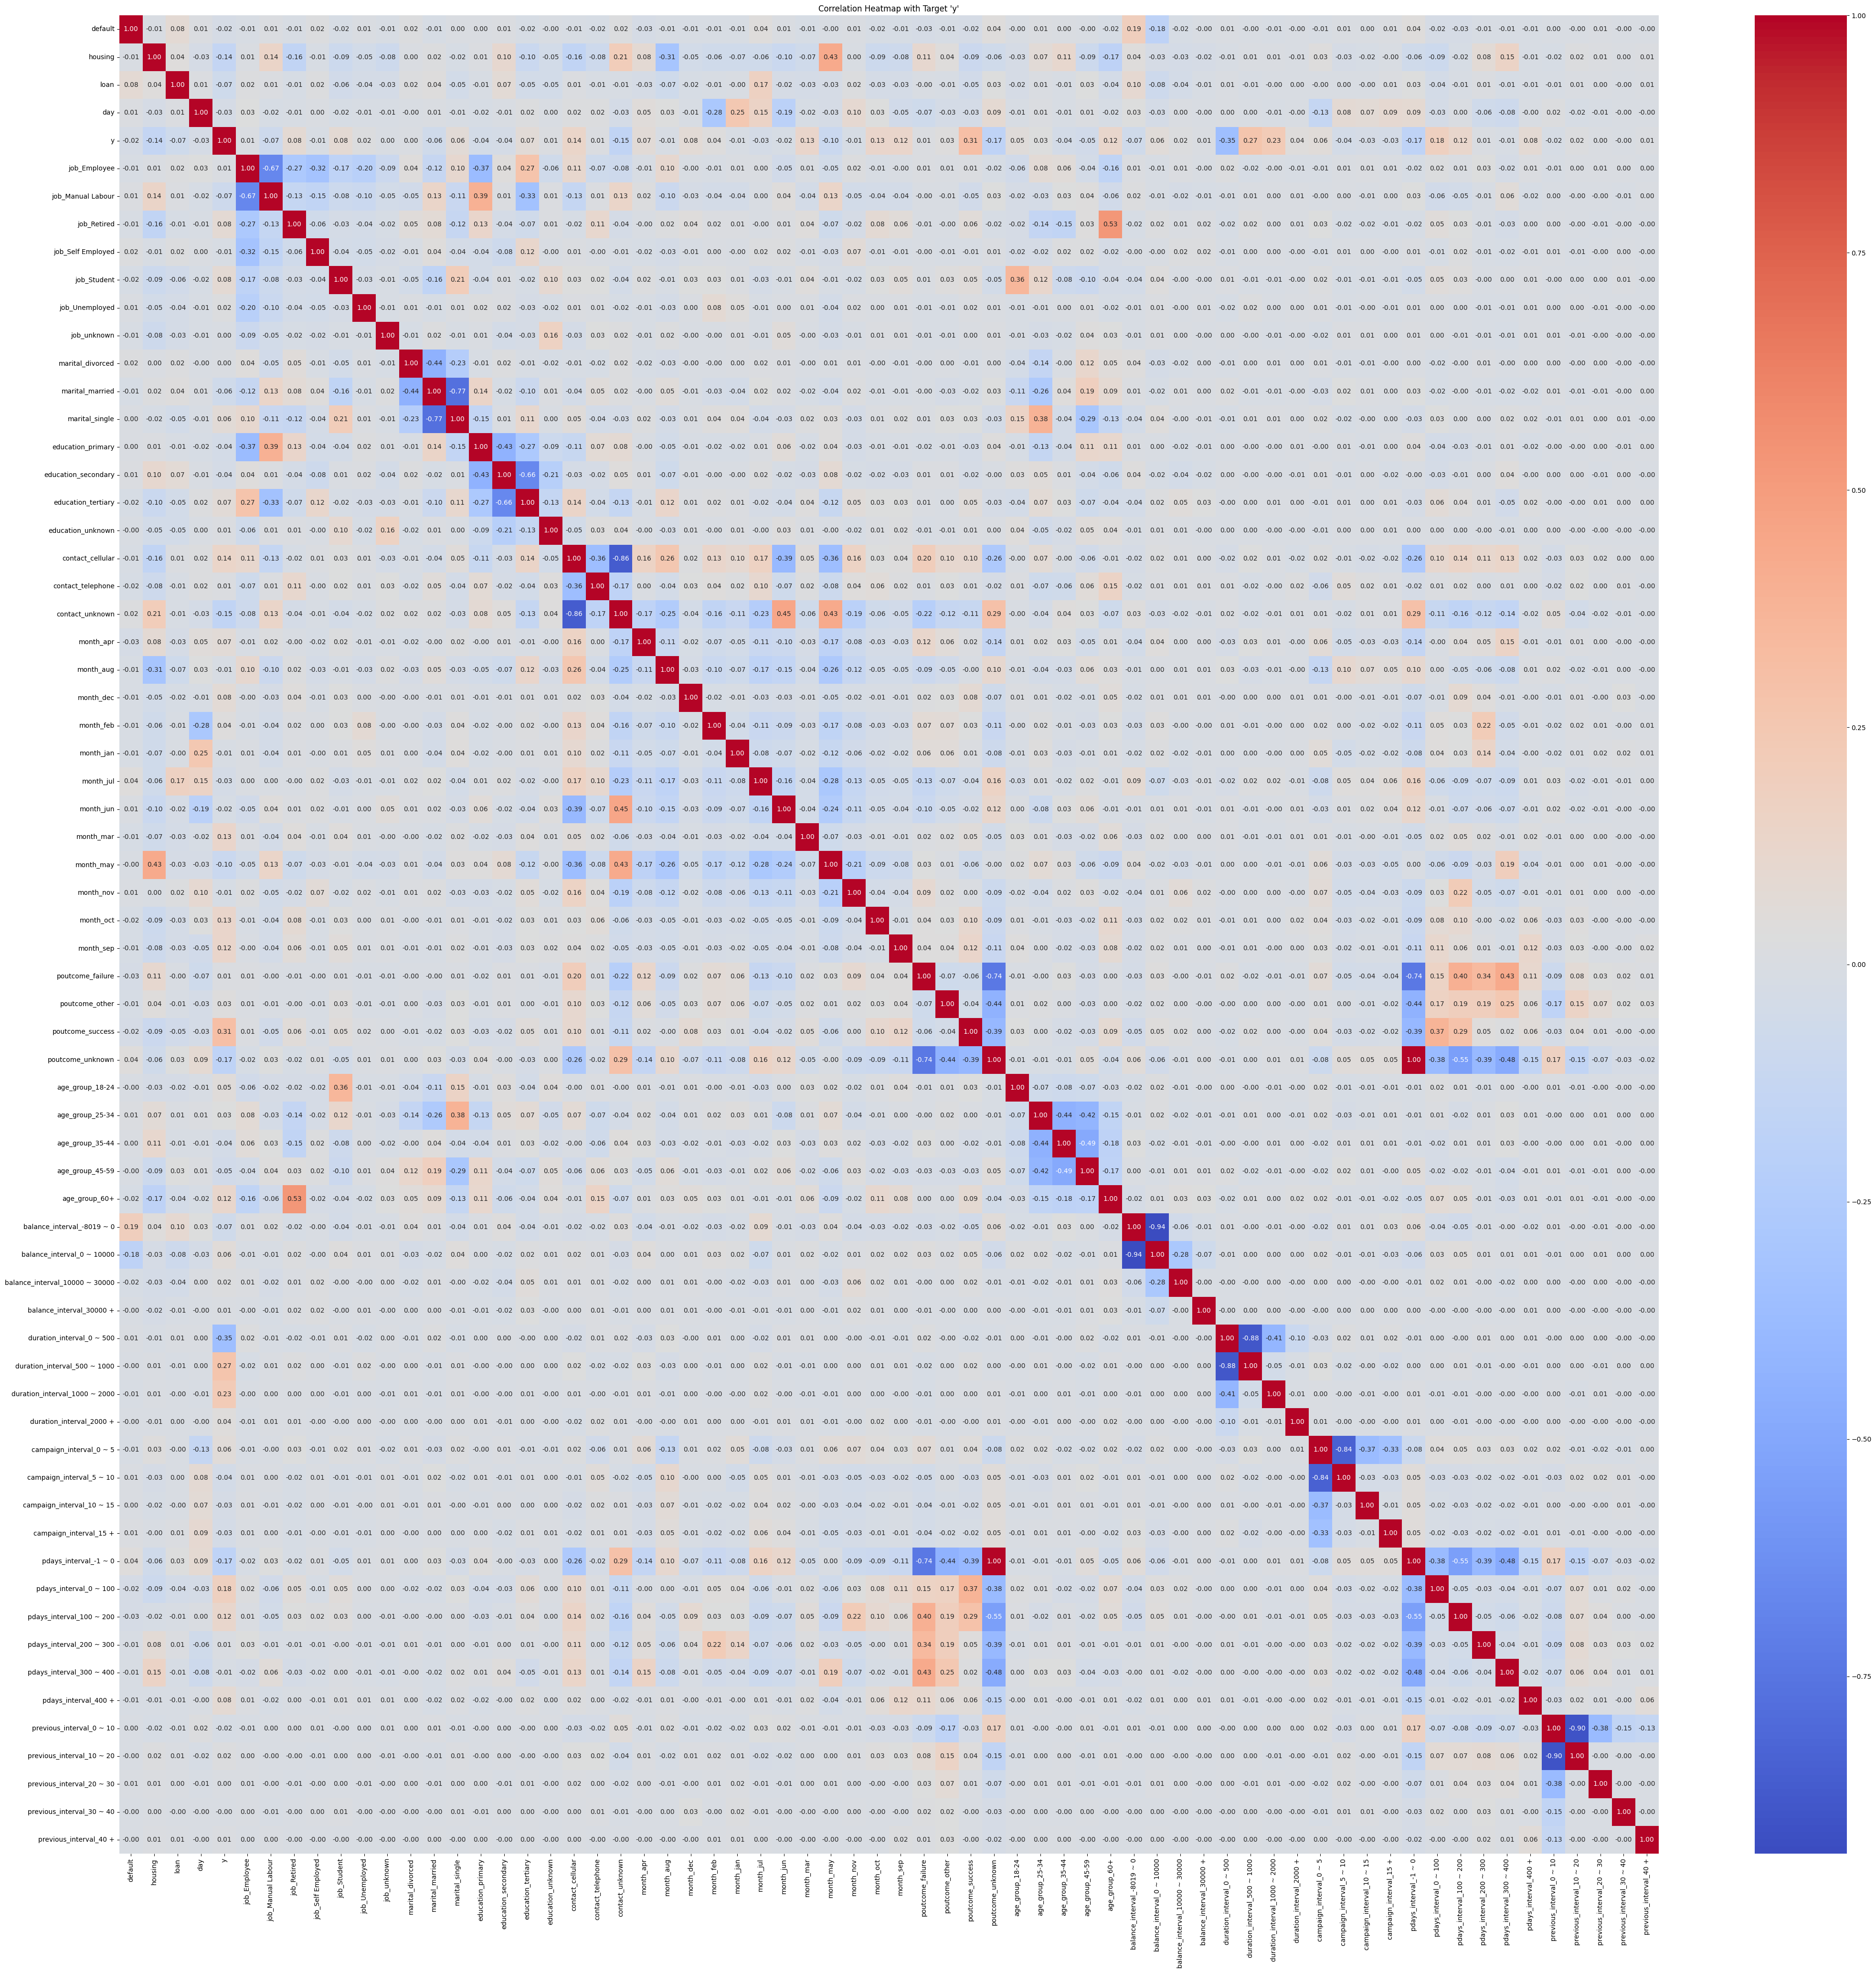

In [36]:
# Calculate the correlation matrix
correlation_matrix = bd.corr()

# Create a heatmap
plt.figure(figsize=(52, 50))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Target 'y'")
plt.show()


In [37]:
# Dropping variables

variables_to_drop = [
    'job_Employee', 'job_Manual Labour', 'job_Retired', 'job_Self Employed', 'job_Student', 'job_Unemployed',
    'marital_divorced', 'marital_married', 'marital_single',
    'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
    'month_may', 'month_nov', 'month_oct', 'month_sep',
    'pdays_interval_-1 ~ 0'
    ]


bd = bd.drop(variables_to_drop, axis=1)


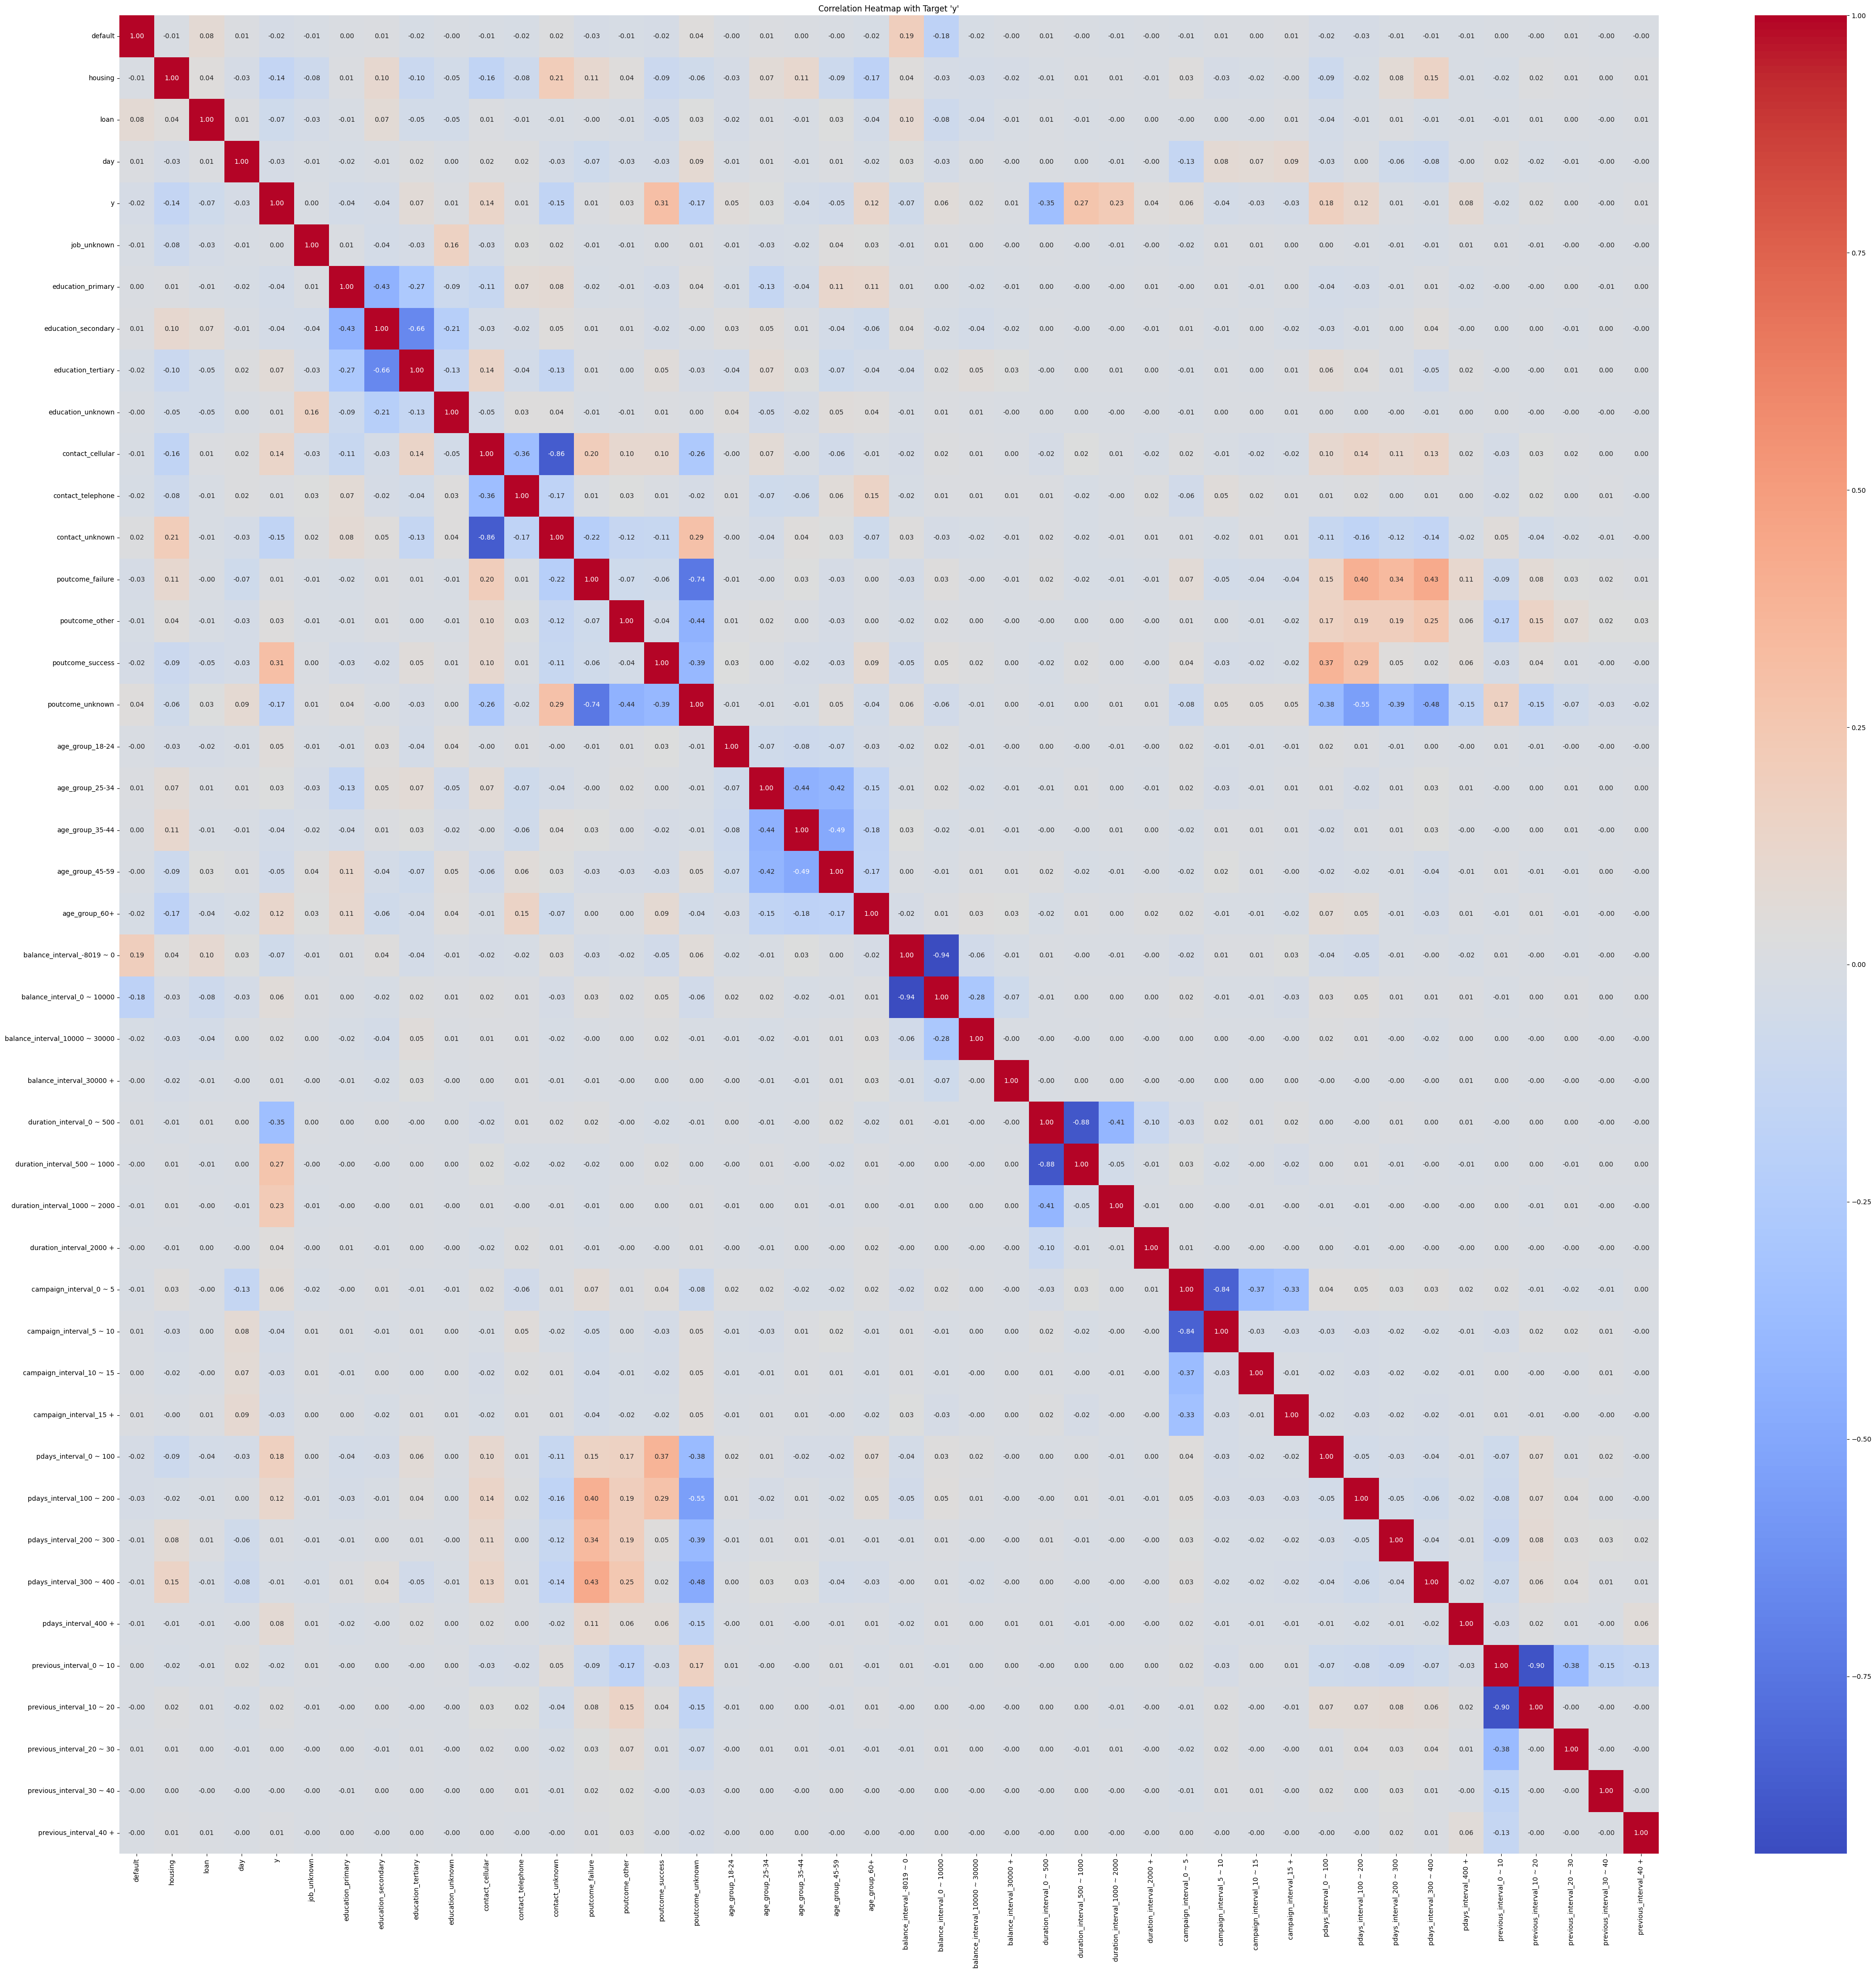

In [38]:
# Calculate the correlation matrix
correlation_matrix = bd.corr()

# Create a heatmap
plt.figure(figsize=(52, 50))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Target 'y'")
plt.show()


**Initial Results**

Baseline Models and Cross Validation

In [39]:
# LOGISTIC REGRESSION

# Data Splitting
# The training set represents 60% of the original data, the validation set 20%, and the test set 20%

X = bd.drop('y', axis=1)
y = bd['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Logistic Regression model is instantiated with a maximum number of iterations set to 1000

logistic_model = LogisticRegression(max_iter=1000)

# Cross-validation with 5 folds and accuracy as the scoring metric

cross_val_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

# The Logistic Regression model is trained with the training data

logistic_model.fit(X_train, y_train)

# The model is used to predict outcomes on the validation set. Classification report and confusion matrix are generated to evaluate performance on the validation set.

y_val_pred = logistic_model.predict(X_val)

classification_report_val = classification_report(y_val, y_val_pred)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)


y_test_pred = logistic_model.predict(X_test)

classification_report_test = classification_report(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Cross-Validation Scores:")
print(cross_val_scores)

print("Classification Report (Validation Set):")
print(classification_report_val)

print("Confusion Matrix (Validation Set):")
print(confusion_matrix_val)

print("Classification Report (Test Set):")
print(classification_report_test)

print("Confusion Matrix (Test Set):")
print(confusion_matrix_test)


Cross-Validation Scores:
[0.8980833  0.8956682  0.89511521 0.89806452 0.8921659 ]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.61      0.32      0.42      1048

    accuracy                           0.90      9042
   macro avg       0.76      0.65      0.68      9042
weighted avg       0.88      0.90      0.88      9042

Confusion Matrix (Validation Set):
[[7781  213]
 [ 711  337]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7990
           1       0.58      0.34      0.43      1053

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043

Confusion Matrix (Test Set):
[[7736  254]
 [ 698  355]]


In [40]:
#RANDOM FOREST

# Data Splitting

X = bd.drop('y', axis=1)
y = bd['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest Model

rf_model = RandomForestClassifier()

# Cross-Validation (5 folds and accuracy as the scoring metric)

cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Model Training

rf_model.fit(X_train, y_train)

# Validation Set Evaluation

y_val_pred = rf_model.predict(X_val)

# Test Set Evaluation

y_test_pred = rf_model.predict(X_test)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

validation_classification_report = classification_report(y_val, y_val_pred)
validation_confusion_matrix = confusion_matrix(y_val, y_val_pred)

print("Classification Report (Validation Set):\n", validation_classification_report)
print("Confusion Matrix (Validation Set):\n", validation_confusion_matrix)

test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Classification Report (Test Set):\n", test_classification_report)
print("Confusion Matrix (Test Set):\n", test_confusion_matrix)




Cross-Validation Scores: [0.87965352 0.88368664 0.88       0.8764977  0.8835023 ]
Mean CV Accuracy: 0.8806680312066326
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7994
           1       0.49      0.36      0.41      1048

    accuracy                           0.88      9042
   macro avg       0.70      0.65      0.67      9042
weighted avg       0.87      0.88      0.87      9042

Confusion Matrix (Validation Set):
 [[7599  395]
 [ 675  373]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7990
           1       0.47      0.35      0.40      1053

    accuracy                           0.88      9043
   macro avg       0.69      0.65      0.67      9043
weighted avg       0.86      0.88      0.87      9043

Confusion Matrix (Test Set):
 [[7569  421]
 [ 684  369]]


In [41]:
# NAÏVE BAYES

# Data Splitting

X = bd.drop('y', axis=1)
y = bd['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Naive Bayes Model (Gaussian Naive Bayes)

nb_model = GaussianNB()

# Cross-validation (5 folds and accuracy as the scoring metric)

cross_val_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')

# Model Training

nb_model.fit(X_train, y_train)

# Validation Set Evaluation

y_val_pred = nb_model.predict(X_val)

# Test Set Evaluation

y_test_pred = nb_model.predict(X_test)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

validation_classification_report = classification_report(y_val, y_val_pred)
validation_confusion_matrix = confusion_matrix(y_val, y_val_pred)

print("Classification Report (Validation Set):\n", validation_classification_report)
print("Confusion Matrix (Validation Set):\n", validation_confusion_matrix)

test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Classification Report (Test Set):\n", test_classification_report)
print("Confusion Matrix (Test Set):\n", test_confusion_matrix)



Cross-Validation Scores: [0.83984519 0.80387097 0.85327189 0.84976959 0.85105991]
Mean CV Accuracy: 0.839563508011435
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      7994
           1       0.38      0.60      0.47      1048

    accuracy                           0.84      9042
   macro avg       0.66      0.74      0.69      9042
weighted avg       0.88      0.84      0.86      9042

Confusion Matrix (Validation Set):
 [[6991 1003]
 [ 422  626]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7990
           1       0.40      0.60      0.48      1053

    accuracy                           0.85      9043
   macro avg       0.67      0.74      0.69      9043
weighted avg       0.88      0.85      0.86      9043

Confusion Matrix (Test Set):
 [[7035  955]
 [ 423  630]]


**TUNING**

In [42]:
# LOGISTIC REGRESSION (HT)

# Defines a parameter grid for the hyperparameter 'C', which represents the inverse of regularization strength

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Performs a grid search cross-validation using the specified parameter grid. The evaluation metric is set to 'recall', and 5-fold cross-validation is used

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extracts the best hyperparameter 'C' from the grid search results

best_C = grid_search.best_params_['C']

# Recreate Logistic Regression Model with Best Hyperparameter

logistic_model = LogisticRegression(C=best_C, max_iter=1000)

# Model Training with Best Hyperparameter

logistic_model.fit(X_train, y_train)

# Validation Set Evaluation

y_val_pred = logistic_model.predict(X_val)

classification_report_val = classification_report(y_val, y_val_pred)
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)

# Test Set Evaluation

y_test_pred = logistic_model.predict(X_test)

classification_report_test = classification_report(y_test, y_test_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Cross-Validation Scores:")
print(cross_val_scores)

print("Classification Report (Validation Set):")
print(classification_report_val)

print("Confusion Matrix (Validation Set):")
print(confusion_matrix_val)

print("Classification Report (Test Set):")
print(classification_report_test)

print("Confusion Matrix (Test Set):")
print(confusion_matrix_test)

Cross-Validation Scores:
[0.83984519 0.80387097 0.85327189 0.84976959 0.85105991]
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7994
           1       0.61      0.32      0.42      1048

    accuracy                           0.90      9042
   macro avg       0.76      0.65      0.68      9042
weighted avg       0.88      0.90      0.88      9042

Confusion Matrix (Validation Set):
[[7778  216]
 [ 708  340]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7990
           1       0.58      0.34      0.43      1053

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.88      0.89      0.88      9043

Confusion Matrix (Test Set):
[[7735  255]
 [ 697  356]]


In [43]:
# RANDOM FOREST (HT)

X = bd.drop('y', axis=1)
y = bd['y']

# Train-Test Split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Defines a hyperparameter grid for the Random Forest model with varying values for n_estimators, max_depth, criterion, and class_weight

n_estimators = [100, 500, 1000]
max_depth = [10, 20, 30]
criterion = ['gini', 'entropy']
class_weight = ['balanced', None]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'criterion': criterion,
    'class_weight': class_weight
}

# Initializes a Random Forest model with a random state for reproducibility

rf_model = RandomForestClassifier(random_state=42)

# Performs a grid search cross-validation using the specified parameter grid. The evaluation metric is set to 'recall', and 5-fold cross-validation is used

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extracts the best hyperparameters from the grid search results

best_params = grid_search.best_params_

# Recreate Random Forest Model with Best Hyperparameters

rf_model_tuned = RandomForestClassifier(random_state=42, **best_params)

# Model Training with Best Hyperparameters

rf_model_tuned.fit(X_train, y_train)

# Validation Set Evaluation

y_val_pred = rf_model_tuned.predict(X_val)

# Test Set Evaluation

y_test_pred = rf_model_tuned.predict(X_test)

# Prints cross-validation scores and the mean accuracy

cross_val_scores = cross_val_score(rf_model_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

# Prints classification reports and confusion matrices for both the validation and test sets

validation_classification_report = classification_report(y_val, y_val_pred)
validation_confusion_matrix = confusion_matrix(y_val, y_val_pred)
print("Classification Report (Validation Set):\n", validation_classification_report)
print("Confusion Matrix (Validation Set):\n", validation_confusion_matrix)

test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Set):\n", test_classification_report)
print("Confusion Matrix (Test Set):\n", test_confusion_matrix)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Cross-Validation Scores: [0.84647991 0.81861751 0.83778802 0.82875576 0.83078341]
Mean CV Accuracy: 0.8324849223995747
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      7994
           1       0.38      0.74      0.50      1048

    accuracy                           0.83      9042
   macro avg       0.67      0.79      0.70      9042
weighted avg       0.89      0.83      0.85      9042

Confusion Matrix (Validation Set):
 [[6718 1276]
 [ 277  771]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.96      0.84      0.90      7990
           1       0.38      0.74      0.50      1053

    accuracy                           0.83      9043
   macro avg       0.67      0.79      0.70      9043
weighted avg       0.89      0.83      0.85      9043

Confusion Matrix (Test Set):
 [[6749 1241]
 [ 279  774]]


In [44]:
# NAÏVE BAYES (HT)

X = bd.drop('y', axis=1)
y = bd['y']

# Splits the dataset into training, validation, and test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Naive Bayes Model Initialization

nb_model = GaussianNB()

# Defines a hyperparameter grid for the Naive Bayes model with varying values for priors

param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6]]
}

# Performs a grid search cross-validation using the specified parameter grid. The evaluation metric is set to 'accuracy', and 5-fold cross-validation is used

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extracts the best hyperparameters from the grid search results

best_params = grid_search.best_params_

# Recreate Naive Bayes Model with Best Hyperparameters

nb_model_tuned = GaussianNB(priors=best_params['priors'])

# Model Training with Best Hyperparameters

nb_model_tuned.fit(X_train, y_train)

# Validation Set Evaluation

y_val_pred = nb_model_tuned.predict(X_val)

# Test Set Evaluation

y_test_pred = nb_model_tuned.predict(X_test)

# Prints cross-validation scores and the mean accuracy

cross_val_scores = cross_val_score(nb_model_tuned, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

# Classification Reports and Confusion Matrices

validation_classification_report = classification_report(y_val, y_val_pred)
validation_confusion_matrix = confusion_matrix(y_val, y_val_pred)
print("Classification Report (Validation Set):\n", validation_classification_report)
print("Confusion Matrix (Validation Set):\n", validation_confusion_matrix)

test_classification_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Set):\n", test_classification_report)
print("Confusion Matrix (Test Set):\n", test_confusion_matrix)

Cross-Validation Scores: [0.83984519 0.80387097 0.85327189 0.84976959 0.85105991]
Mean CV Accuracy: 0.839563508011435
Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      7994
           1       0.38      0.60      0.47      1048

    accuracy                           0.84      9042
   macro avg       0.66      0.74      0.69      9042
weighted avg       0.88      0.84      0.86      9042

Confusion Matrix (Validation Set):
 [[6991 1003]
 [ 422  626]]
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      7990
           1       0.40      0.60      0.48      1053

    accuracy                           0.85      9043
   macro avg       0.67      0.74      0.69      9043
weighted avg       0.88      0.85      0.86      9043

Confusion Matrix (Test Set):
 [[7035  955]
 [ 423  630]]
